In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('games-data.csv')
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


In [3]:
df = df.sort_values(by='RecommendationCount',ascending=False)
df = df.iloc[:5000]
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
27,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00
150,Garrys Mod,Nov 29 2006,0,237684,False,False,True,False,False,False,False,False,True,False,False,False,False,False,9.99
4028,Unturned,Jul 7 2014,0,222301,True,False,True,True,True,True,False,False,False,True,True,False,False,False,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,Event[0],Sep 14 2016,84,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,19.99
9001,The Treasures of Montezuma 5,Mar 10 2016,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,6.99
9002,Tokyo Babel,Mar 31 2016,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,34.99
9900,Just Bones,Jun 9 2016,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,4.99


In [4]:
df.isnull().sum()

ResponseName                    0
ReleaseDate                    17
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

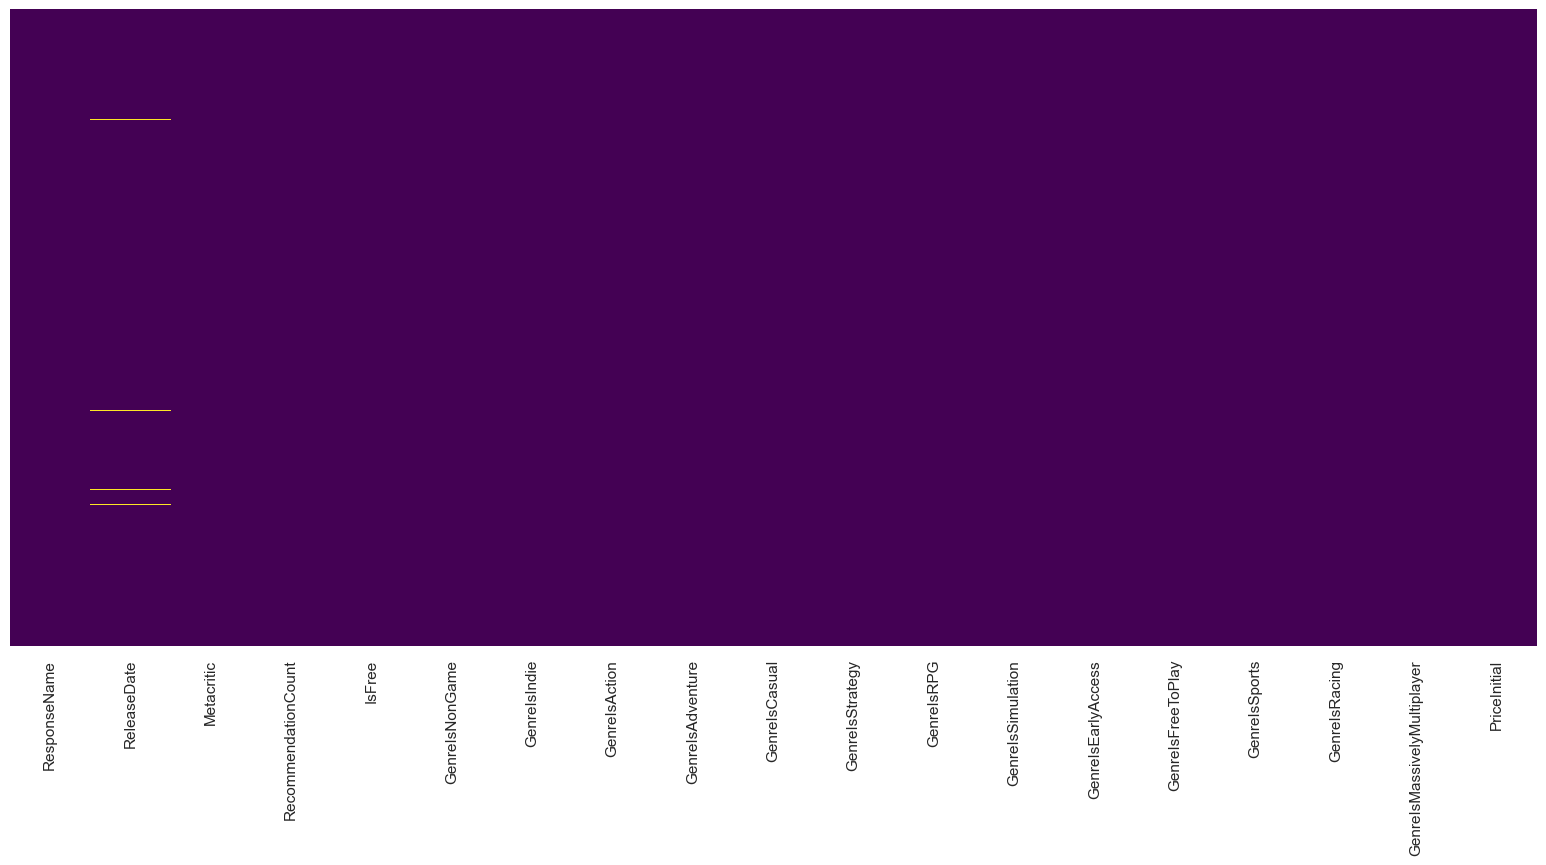

In [5]:
sns.set(rc={'figure.figsize':(19.7, 8.27)})
sns.heatmap(
  df.isnull(),
  yticklabels=False,
  cbar=False,
  cmap='viridis'
)

plt.show()



In [6]:
df.dropna(inplace=True)
# 96  1427633

In [7]:
df['score'] = ((df.Metacritic/96)*0.5 + (df.RecommendationCount/1427633)*0.5)*1000
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
27,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.291667
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00,675.553849
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00,613.637150
150,Garrys Mod,Nov 29 2006,0,237684,False,False,True,False,False,False,False,False,True,False,False,False,False,False,9.99,83.244083
4028,Unturned,Jul 7 2014,0,222301,True,False,True,True,True,True,False,False,False,True,True,False,False,False,0.00,77.856494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,Event[0],Sep 14 2016,84,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,19.99,437.500000
9001,The Treasures of Montezuma 5,Mar 10 2016,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,6.99,0.000000
9002,Tokyo Babel,Mar 31 2016,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,34.99,0.000000
9900,Just Bones,Jun 9 2016,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,4.99,0.000000


In [8]:
df = df.sort_values(by='score',ascending=False)

In [9]:
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
27,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.291667
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00,675.553849
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00,613.637150
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,553.530790
3088,Grand Theft Auto V,Apr 13 2015,96,136846,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,547.927584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,Bonsai,Feb 18 2016,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.99,0.000000
8948,Spellbind,Mar 4 2016,0,0,False,False,True,False,True,True,False,False,False,False,False,False,False,False,2.99,0.000000
9932,Galaxy Golf,Aug 24 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,4.99,0.000000
8525,Nordenfelt,Jan 14 2016,0,0,False,False,True,True,False,False,False,False,False,False,False,False,False,False,8.99,0.000000


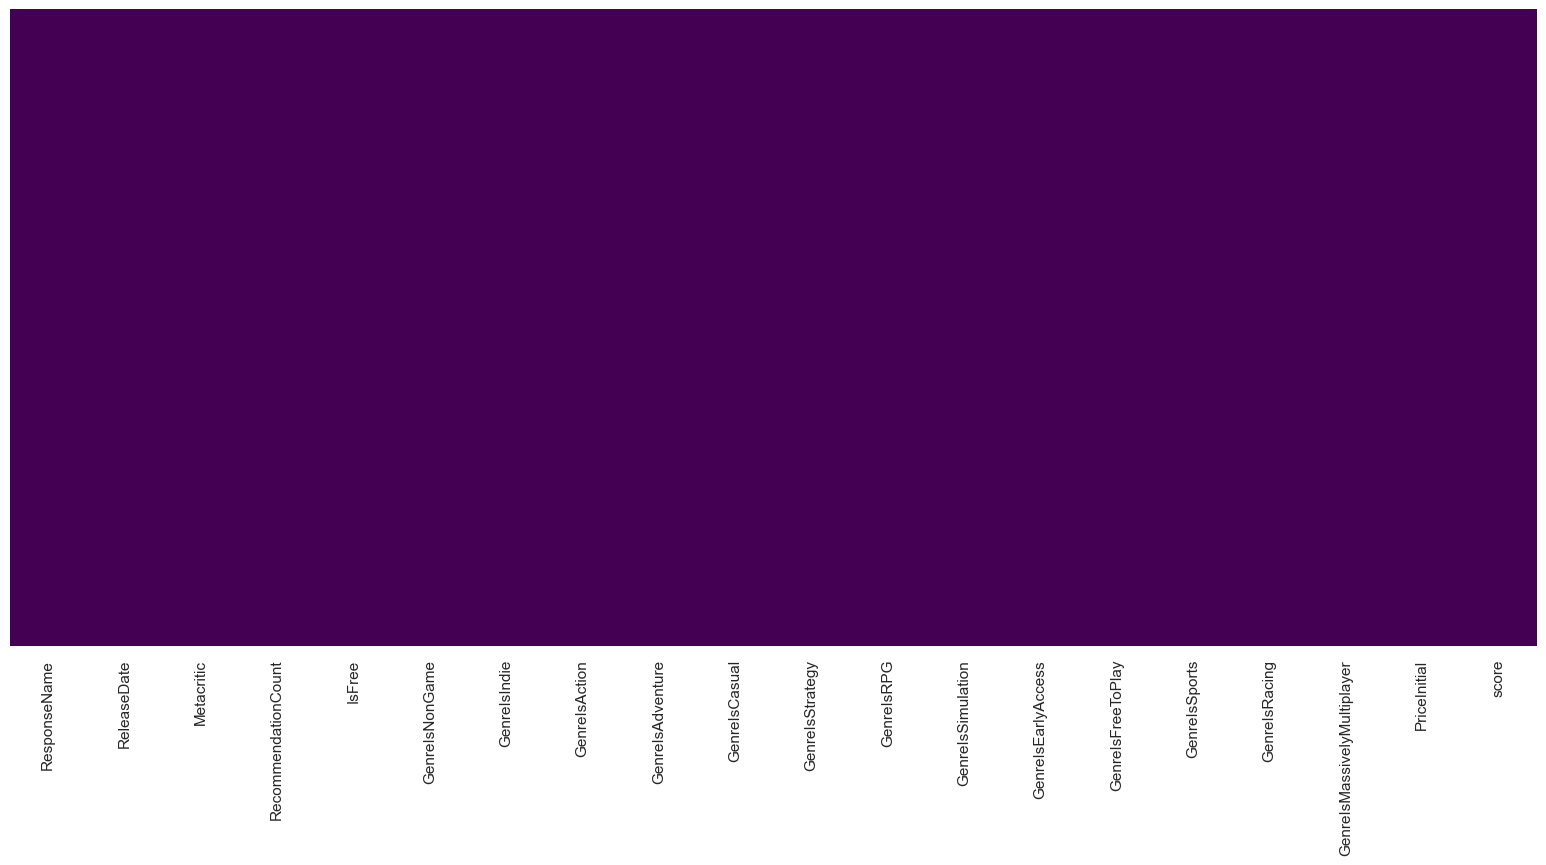

In [10]:
sns.set(rc={'figure.figsize':(19.7, 8.27)})
sns.heatmap(
  df.isnull(),
  yticklabels=False,
  cbar=False,
  cmap='viridis'
)

plt.show()

In [11]:
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
27,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.291667
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00,675.553849
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00,613.637150
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,553.530790
3088,Grand Theft Auto V,Apr 13 2015,96,136846,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,547.927584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,Bonsai,Feb 18 2016,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.99,0.000000
8948,Spellbind,Mar 4 2016,0,0,False,False,True,False,True,True,False,False,False,False,False,False,False,False,2.99,0.000000
9932,Galaxy Golf,Aug 24 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,4.99,0.000000
8525,Nordenfelt,Jan 14 2016,0,0,False,False,True,True,False,False,False,False,False,False,False,False,False,False,8.99,0.000000


In [12]:
df.sort_values(by='score',ascending=False)

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
27,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.291667
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00,675.553849
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00,613.637150
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,553.530790
3088,Grand Theft Auto V,Apr 13 2015,96,136846,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,547.927584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,hackmud,Sep 22 2016,0,0,False,False,True,False,False,False,False,True,True,False,False,False,False,True,0.00,0.000000
9000,Red Comrades 2: For the Great Justice,Sep 22 2016,0,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,0.00,0.000000
9001,The Treasures of Montezuma 5,Mar 10 2016,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,6.99,0.000000
9002,Tokyo Babel,Mar 31 2016,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,34.99,0.000000


In [13]:
df
df.to_csv('game_rank.csv')

In [14]:
for i in list(df):
   print(i) 



ResponseName
ReleaseDate
Metacritic
RecommendationCount
IsFree
GenreIsNonGame
GenreIsIndie
GenreIsAction
GenreIsAdventure
GenreIsCasual
GenreIsStrategy
GenreIsRPG
GenreIsSimulation
GenreIsEarlyAccess
GenreIsFreeToPlay
GenreIsSports
GenreIsRacing
GenreIsMassivelyMultiplayer
PriceInitial
score


In [15]:
# -*- coding:utf-8 -*-  
# csv转换成json
import csv
import json
 
file_path = "game_rank.csv"
# 指定encodeing='utf-8'中文防止乱码
csvfile = open(file_path,'r', encoding='utf-8')
jsonfile = open('games-data.json', 'w',encoding='utf-8')
 
# 指定列名
fieldnames = ("number","ResponseName",
"ReleaseDate",
"Metacritic",
"RecommendationCount",
"IsFree",
"GenreIsNonGame",
"GenreIsIndie",
"GenreIsAction",
"GenreIsAdventure",
"GenreIsCasual",
"GenreIsStrategy",
"GenreIsRPG",
"GenreIsSimulation",
"GenreIsEarlyAccess",
"GenreIsFreeToPlay",
"GenreIsSports",
"GenreIsRacing",
"GenreIsMassivelyMultiplayer",
"PriceInitial",
"score")
 
reader = csv.DictReader( csvfile, fieldnames)
# 指定ensure_ascii=False 为了不让中文显示为ascii字符码
out = json.dumps( [ row for row in reader ] ,ensure_ascii=False)
 
jsonfile.write(out)



2873656

In [16]:
f = open('games-data.json')
data = json.load(f)
f.close()
data

[{'number': '',
  'ResponseName': 'ResponseName',
  'ReleaseDate': 'ReleaseDate',
  'Metacritic': 'Metacritic',
  'RecommendationCount': 'RecommendationCount',
  'IsFree': 'IsFree',
  'GenreIsNonGame': 'GenreIsNonGame',
  'GenreIsIndie': 'GenreIsIndie',
  'GenreIsAction': 'GenreIsAction',
  'GenreIsAdventure': 'GenreIsAdventure',
  'GenreIsCasual': 'GenreIsCasual',
  'GenreIsStrategy': 'GenreIsStrategy',
  'GenreIsRPG': 'GenreIsRPG',
  'GenreIsSimulation': 'GenreIsSimulation',
  'GenreIsEarlyAccess': 'GenreIsEarlyAccess',
  'GenreIsFreeToPlay': 'GenreIsFreeToPlay',
  'GenreIsSports': 'GenreIsSports',
  'GenreIsRacing': 'GenreIsRacing',
  'GenreIsMassivelyMultiplayer': 'GenreIsMassivelyMultiplayer',
  'PriceInitial': 'PriceInitial',
  'score': 'score'},
 {'number': '27',
  'ResponseName': 'Counter-Strike: Global Offensive',
  'ReleaseDate': 'Aug 21 2012',
  'Metacritic': '83',
  'RecommendationCount': '1427633',
  'IsFree': 'False',
  'GenreIsNonGame': 'False',
  'GenreIsIndie': 'False'

In [17]:
regex = '19\d\d$|20\d\d$'
for i in data:
    if re.finditer(regex,i['ReleaseDate']) is not None:
        for t in re.finditer(regex,i['ReleaseDate']):
            i['ReleaseDate']=int(t.group())
data

[{'number': '',
  'ResponseName': 'ResponseName',
  'ReleaseDate': 'ReleaseDate',
  'Metacritic': 'Metacritic',
  'RecommendationCount': 'RecommendationCount',
  'IsFree': 'IsFree',
  'GenreIsNonGame': 'GenreIsNonGame',
  'GenreIsIndie': 'GenreIsIndie',
  'GenreIsAction': 'GenreIsAction',
  'GenreIsAdventure': 'GenreIsAdventure',
  'GenreIsCasual': 'GenreIsCasual',
  'GenreIsStrategy': 'GenreIsStrategy',
  'GenreIsRPG': 'GenreIsRPG',
  'GenreIsSimulation': 'GenreIsSimulation',
  'GenreIsEarlyAccess': 'GenreIsEarlyAccess',
  'GenreIsFreeToPlay': 'GenreIsFreeToPlay',
  'GenreIsSports': 'GenreIsSports',
  'GenreIsRacing': 'GenreIsRacing',
  'GenreIsMassivelyMultiplayer': 'GenreIsMassivelyMultiplayer',
  'PriceInitial': 'PriceInitial',
  'score': 'score'},
 {'number': '27',
  'ResponseName': 'Counter-Strike: Global Offensive',
  'ReleaseDate': 2012,
  'Metacritic': '83',
  'RecommendationCount': '1427633',
  'IsFree': 'False',
  'GenreIsNonGame': 'False',
  'GenreIsIndie': 'False',
  'Genr

In [18]:
df = pd.DataFrame(data)
df.drop([0],inplace = True)
del df['number']
df

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
1,Counter-Strike: Global Offensive,2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.2916666666667
2,Dota 2,2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.0,675.5538494487029
3,Team Fortress 2,2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.0,613.6371503273834
4,The Elder Scrolls V: Skyrim,2011,94,182587,False,False,False,False,False,False,False,True,False,False,False,False,False,False,19.99,553.5307904178921
5,Grand Theft Auto V,2015,96,136846,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,547.9275836296863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,Bonsai,2016,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.99,0.0
4980,Spellbind,2016,0,0,False,False,True,False,True,True,False,False,False,False,False,False,False,False,2.99,0.0
4981,Galaxy Golf,2016,0,0,False,False,True,False,False,True,False,False,False,False,False,True,False,False,4.99,0.0
4982,Nordenfelt,2016,0,0,False,False,True,True,False,False,False,False,False,False,False,False,False,False,8.99,0.0


In [19]:
df.sort_values(by = 'score',ascending=False)

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,score
1,Counter-Strike: Global Offensive,2012,83,1427633,False,False,False,True,False,False,False,False,False,False,False,False,False,False,14.99,932.2916666666667
1857,Brawlhalla,2014,0,27890,True,False,True,True,False,False,False,False,False,True,True,False,False,False,0.0,9.767916544378002
1858,ORION: Prelude,2013,0,27713,True,False,True,True,True,False,False,False,False,False,True,False,False,False,0.0,9.705925822672913
1859,Batman(tm): Arkham Knight,2015,0,27235,False,False,False,True,True,False,False,False,False,False,False,False,False,False,29.99,9.538515851062563
1860,Geometry Dash,2014,0,27117,False,False,True,True,False,False,False,False,False,False,False,False,False,False,3.99,9.497188703259171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,hackmud,2016,0,0,False,False,True,False,False,False,False,True,True,False,False,False,False,True,0.0,0.0
4888,Red Comrades 2: For the Great Justice,2016,0,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,0.0,0.0
4887,The Treasures of Montezuma 5,2016,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,6.99,0.0
4886,Tokyo Babel,2016,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,34.99,0.0


In [20]:
year_rank = df.groupby('ReleaseDate')[[
 'ResponseName',
 'score'
 ]].sum().sort_values(by='score',ascending=False)
year_rank

,ResponseName,score
ReleaseDate,,
2012,Counter-Strike: Global OffensiveBorderlands 2D...,932.2916666666667493.7882356378238482.86433368...
2013,Dota 2BioShock InfinitePAYDAY 2System Shock 2D...,675.5538494487029509.02530476436635488.4259433...
2007,Team Fortress 2BioShock(tm)QUAKECompany of Her...,613.6371503273834505.694740875281490.026724597...
2011,The Elder Scrolls V: SkyrimPortal 2Portal 2Por...,553.5307904178921520.4088946237116520.40329094...
2015,Grand Theft Auto VThe Witcher(r) 3: Wild HuntU...,547.9275836296863502.00032807801443500.2904428...
2009,Left 4 Dead 2The Elder Scrolls IV: Oblivion(r)...,512.8281429529391492.3123260086217479.59744964...
2004,Half-Life 2Unreal Tournament 2004: Editors Cho...,512.5354345269408484.8366032271599477.22159102...
1998,Half-Life,504.37297260570466
2010,Sid Meiers Civilization(r) VSid Meiers Civiliz...,498.79623737333054498.78222817068536492.127054...


In [21]:
year_2012 = []
year_2013 = []
year_2007 = []
year_2011 = []
year_2015 = []
year_2009 = []
year_2004 = []
year_1998 = []
year_2010 = []
year_2016 = []
year_2006 = []
year_2000 = []
year_2008 = []
year_2014 = []
year_2005 = []
year_2001 = []
year_2003 = []
year_1999 = []
year_1997 = []
year_2017 = []

In [22]:
data

[{'number': '',
  'ResponseName': 'ResponseName',
  'ReleaseDate': 'ReleaseDate',
  'Metacritic': 'Metacritic',
  'RecommendationCount': 'RecommendationCount',
  'IsFree': 'IsFree',
  'GenreIsNonGame': 'GenreIsNonGame',
  'GenreIsIndie': 'GenreIsIndie',
  'GenreIsAction': 'GenreIsAction',
  'GenreIsAdventure': 'GenreIsAdventure',
  'GenreIsCasual': 'GenreIsCasual',
  'GenreIsStrategy': 'GenreIsStrategy',
  'GenreIsRPG': 'GenreIsRPG',
  'GenreIsSimulation': 'GenreIsSimulation',
  'GenreIsEarlyAccess': 'GenreIsEarlyAccess',
  'GenreIsFreeToPlay': 'GenreIsFreeToPlay',
  'GenreIsSports': 'GenreIsSports',
  'GenreIsRacing': 'GenreIsRacing',
  'GenreIsMassivelyMultiplayer': 'GenreIsMassivelyMultiplayer',
  'PriceInitial': 'PriceInitial',
  'score': 'score'},
 {'number': '27',
  'ResponseName': 'Counter-Strike: Global Offensive',
  'ReleaseDate': 2012,
  'Metacritic': '83',
  'RecommendationCount': '1427633',
  'IsFree': 'False',
  'GenreIsNonGame': 'False',
  'GenreIsIndie': 'False',
  'Genr

In [23]:
for i in data:
    if i['ReleaseDate']== 2012:
        year_2012.append(i['ResponseName'])
    elif i['ReleaseDate']== 2013:
        year_2013.append(i['ResponseName'])
    elif i['ReleaseDate']== 2007:
        year_2007.append(i['ResponseName'])
    elif i['ReleaseDate']== 2011:
        year_2011.append(i['ResponseName'])
    elif i['ReleaseDate']== 2015:
        year_2015.append(i['ResponseName'])
    elif i['ReleaseDate']== 2009:
        year_2009.append(i['ResponseName'])
    elif i['ReleaseDate']== 2004:
        year_2004.append(i['ResponseName'])
    elif i['ReleaseDate']== 1998:
        year_1998.append(i['ResponseName'])
    elif i['ReleaseDate']== 2010:
        year_2010.append(i['ResponseName'])
    elif i['ReleaseDate']== 2016:
        year_2016.append(i['ResponseName'])
    elif i['ReleaseDate']== 2006:
        year_2006.append(i['ResponseName'])
    elif i['ReleaseDate']== 2000:
        year_2000.append(i['ResponseName'])
    elif i['ReleaseDate']== 2008:
        year_2008.append(i['ResponseName'])
    elif i['ReleaseDate']== 2014:
        year_2014.append(i['ResponseName'])
    elif i['ReleaseDate']== 2005:
        year_2005.append(i['ResponseName'])
    elif i['ReleaseDate']== 2001:
        year_2001.append(i['ResponseName'])
    elif i['ReleaseDate']== 2003:
        year_2003.append(i['ResponseName'])
    elif i['ReleaseDate']== 1999:
        year_1999.append(i['ResponseName'])
    elif i['ReleaseDate']== 1997:
        year_1997.append(i['ResponseName'])
    elif i['ReleaseDate']== 2017:
        year_2017.append(i['ResponseName'])

In [24]:
year_2012

['Counter-Strike: Global Offensive',
 'Borderlands 2',
 'Dishonored',
 'Batman: Arkham City - Game of the Year Edition',
 'Thief(tm) Gold',
 'Mark of the Ninja',
 'XCOM: Enemy Unknown',
 'Far Cry 3',
 'NBA 2K13',
 'The Witcher 2: Assassins of Kings Enhanced Edition',
 'Torchlight II',
 'Super Hexagon',
 'Max Payne 3',
 'DARK SOULS(tm): Prepare To Die(tm) Edition',
 'Thirty Flights of Loving',
 'Hotline Miami',
 'Thief(tm) II: The Metal Age',
 'Tribes: Ascend',
 'The Lord of the Rings Online',
 'The Lord of the Rings Online',
 'PlanetSide 2',
 'FTL: Faster Than Light',
 'Rayman(r) Origins',
 'Total War: Shogun 2 - Fall of the Samurai',
 'STAR WARS(tm) Knights of the Old Republic(tm) II - The Sith Lords(tm)',
 'Unity of Command: Stalingrad Campaign',
 'GT Legends',
 'Alan Wake',
 'The Walking Dead',
 'Orcs Must Die! 2',
 'Realm of the Mad God',
 'Crusader Kings II',
 'Tales From Space: Mutant Blobs Attack',
 'To the Moon',
 'Sins of a Solar Empire(r): Rebellion',
 'Legend of Grimrock',
 

In [25]:
 
IsFree_2012_count = 0
GenreIsNonGame_2012_count = 0
GenreIsIndie_2012_count = 0
GenreIsAction_2012_count = 0
GenreIsAdventure_2012_count = 0
GenreIsCasual_2012_count = 0
GenreIsStrategy_2012_count = 0
GenreIsRPG_2012_count = 0
GenreIsSimulation_2012_count = 0
GenreIsEarlyAccess_2012_count = 0
GenreIsFreeToPlay_2012_count = 0
GenreIsSports_2012_count = 0
GenreIsRacing_2012_count = 0
GenreIsMassivelyMultiplayer_2012_count = 0

In [26]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2012:
        IsFree_2012_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsNonGame_2012_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsIndie_2012_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsAction_2012_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsAdventure_2012_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsCasual_2012_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsStrategy_2012_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsRPG_2012_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsSimulation_2012_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsEarlyAccess_2012_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsFreeToPlay_2012_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsSports_2012_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsRacing_2012_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2012:
        GenreIsMassivelyMultiplayer_2012_count += 1 

In [27]:
IsFree_2013_count = 0
GenreIsNonGame_2013_count = 0
GenreIsIndie_2013_count = 0
GenreIsAction_2013_count = 0
GenreIsAdventure_2013_count = 0
GenreIsCasual_2013_count = 0
GenreIsStrategy_2013_count = 0
GenreIsRPG_2013_count = 0
GenreIsSimulation_2013_count = 0
GenreIsEarlyAccess_2013_count = 0
GenreIsFreeToPlay_2013_count = 0
GenreIsSports_2013_count = 0
GenreIsRacing_2013_count = 0
GenreIsMassivelyMultiplayer_2013_count = 0

In [28]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2013:
        IsFree_2013_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsNonGame_2013_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsIndie_2013_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsAction_2013_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsAdventure_2013_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsCasual_2013_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsStrategy_2013_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsRPG_2013_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsSimulation_2013_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsEarlyAccess_2013_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsFreeToPlay_2013_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsSports_2013_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsRacing_2013_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2013:
        GenreIsMassivelyMultiplayer_2013_count += 1 

In [29]:
IsFree_2007_count = 0
GenreIsNonGame_2007_count = 0
GenreIsIndie_2007_count = 0
GenreIsAction_2007_count = 0
GenreIsAdventure_2007_count = 0
GenreIsCasual_2007_count = 0
GenreIsStrategy_2007_count = 0
GenreIsRPG_2007_count = 0
GenreIsSimulation_2007_count = 0
GenreIsEarlyAccess_2007_count = 0
GenreIsFreeToPlay_2007_count = 0
GenreIsSports_2007_count = 0
GenreIsRacing_2007_count = 0
GenreIsMassivelyMultiplayer_2007_count = 0

In [30]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2007:
        IsFree_2007_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsNonGame_2007_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsIndie_2007_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsAction_2007_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsAdventure_2007_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsCasual_2007_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsStrategy_2007_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsRPG_2007_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsSimulation_2007_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsEarlyAccess_2007_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsFreeToPlay_2007_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsSports_2007_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsRacing_2007_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2007:
        GenreIsMassivelyMultiplayer_2007_count += 1 

In [31]:
IsFree_2011_count = 0
GenreIsNonGame_2011_count = 0
GenreIsIndie_2011_count = 0
GenreIsAction_2011_count = 0
GenreIsAdventure_2011_count = 0
GenreIsCasual_2011_count = 0
GenreIsStrategy_2011_count = 0
GenreIsRPG_2011_count = 0
GenreIsSimulation_2011_count = 0
GenreIsEarlyAccess_2011_count = 0
GenreIsFreeToPlay_2011_count = 0
GenreIsSports_2011_count = 0
GenreIsRacing_2011_count = 0
GenreIsMassivelyMultiplayer_2011_count = 0

In [32]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2011:
        IsFree_2011_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsNonGame_2011_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsIndie_2011_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsAction_2011_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsAdventure_2011_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsCasual_2011_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsStrategy_2011_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsRPG_2011_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsSimulation_2011_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsEarlyAccess_2011_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsFreeToPlay_2011_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsSports_2011_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsRacing_2011_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2011:
        GenreIsMassivelyMultiplayer_2011_count += 1 

In [33]:
IsFree_2015_count = 0
GenreIsNonGame_2015_count = 0
GenreIsIndie_2015_count = 0
GenreIsAction_2015_count = 0
GenreIsAdventure_2015_count = 0
GenreIsCasual_2015_count = 0
GenreIsStrategy_2015_count = 0
GenreIsRPG_2015_count = 0
GenreIsSimulation_2015_count = 0
GenreIsEarlyAccess_2015_count = 0
GenreIsFreeToPlay_2015_count = 0
GenreIsSports_2015_count = 0
GenreIsRacing_2015_count = 0
GenreIsMassivelyMultiplayer_2015_count = 0

In [34]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2015:
        IsFree_2015_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsNonGame_2015_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsIndie_2015_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsAction_2015_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsAdventure_2015_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsCasual_2015_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsStrategy_2015_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsRPG_2015_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsSimulation_2015_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsEarlyAccess_2015_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsFreeToPlay_2015_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsSports_2015_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsRacing_2015_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2015:
        GenreIsMassivelyMultiplayer_2015_count += 1 

In [35]:
IsFree_2009_count = 0
GenreIsNonGame_2009_count = 0
GenreIsIndie_2009_count = 0
GenreIsAction_2009_count = 0
GenreIsAdventure_2009_count = 0
GenreIsCasual_2009_count = 0
GenreIsStrategy_2009_count = 0
GenreIsRPG_2009_count = 0
GenreIsSimulation_2009_count = 0
GenreIsEarlyAccess_2009_count = 0
GenreIsFreeToPlay_2009_count = 0
GenreIsSports_2009_count = 0
GenreIsRacing_2009_count = 0
GenreIsMassivelyMultiplayer_2009_count = 0

In [36]:
for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2009:
        IsFree_2009_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsNonGame_2009_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsIndie_2009_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsAction_2009_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsAdventure_2009_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsCasual_2009_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsStrategy_2009_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsRPG_2009_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsSimulation_2009_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsEarlyAccess_2009_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsFreeToPlay_2009_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsSports_2009_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsRacing_2009_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2009:
        GenreIsMassivelyMultiplayer_2009_count += 1 

In [37]:
IsFree_2004_count = 0
GenreIsNonGame_2004_count = 0
GenreIsIndie_2004_count = 0
GenreIsAction_2004_count = 0
GenreIsAdventure_2004_count = 0
GenreIsCasual_2004_count = 0
GenreIsStrategy_2004_count = 0
GenreIsRPG_2004_count = 0
GenreIsSimulation_2004_count = 0
GenreIsEarlyAccess_2004_count = 0
GenreIsFreeToPlay_2004_count = 0
GenreIsSports_2004_count = 0
GenreIsRacing_2004_count = 0
GenreIsMassivelyMultiplayer_2004_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2004:
        IsFree_2004_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsNonGame_2004_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsIndie_2004_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsAction_2004_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsAdventure_2004_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsCasual_2004_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsStrategy_2004_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsRPG_2004_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsSimulation_2004_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsEarlyAccess_2004_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsFreeToPlay_2004_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsSports_2004_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsRacing_2004_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2004:
        GenreIsMassivelyMultiplayer_2004_count += 1 

In [38]:
IsFree_1998_count = 0
GenreIsNonGame_1998_count = 0
GenreIsIndie_1998_count = 0
GenreIsAction_1998_count = 0
GenreIsAdventure_1998_count = 0
GenreIsCasual_1998_count = 0
GenreIsStrategy_1998_count = 0
GenreIsRPG_1998_count = 0
GenreIsSimulation_1998_count = 0
GenreIsEarlyAccess_1998_count = 0
GenreIsFreeToPlay_1998_count = 0
GenreIsSports_1998_count = 0
GenreIsRacing_1998_count = 0
GenreIsMassivelyMultiplayer_1998_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 1998:
        IsFree_1998_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsNonGame_1998_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsIndie_1998_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsAction_1998_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsAdventure_1998_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsCasual_1998_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsStrategy_1998_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsRPG_1998_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsSimulation_1998_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsEarlyAccess_1998_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsFreeToPlay_1998_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsSports_1998_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsRacing_1998_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 1998:
        GenreIsMassivelyMultiplayer_1998_count += 1 

In [39]:
IsFree_2010_count = 0
GenreIsNonGame_2010_count = 0
GenreIsIndie_2010_count = 0
GenreIsAction_2010_count = 0
GenreIsAdventure_2010_count = 0
GenreIsCasual_2010_count = 0
GenreIsStrategy_2010_count = 0
GenreIsRPG_2010_count = 0
GenreIsSimulation_2010_count = 0
GenreIsEarlyAccess_2010_count = 0
GenreIsFreeToPlay_2010_count = 0
GenreIsSports_2010_count = 0
GenreIsRacing_2010_count = 0
GenreIsMassivelyMultiplayer_2010_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2010:
        IsFree_2010_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsNonGame_2010_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsIndie_2010_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsAction_2010_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsAdventure_2010_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsCasual_2010_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsStrategy_2010_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsRPG_2010_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsSimulation_2010_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsEarlyAccess_2010_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsFreeToPlay_2010_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsSports_2010_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsRacing_2010_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2010:
        GenreIsMassivelyMultiplayer_2010_count += 1 

In [40]:
IsFree_2016_count = 0
GenreIsNonGame_2016_count = 0
GenreIsIndie_2016_count = 0
GenreIsAction_2016_count = 0
GenreIsAdventure_2016_count = 0
GenreIsCasual_2016_count = 0
GenreIsStrategy_2016_count = 0
GenreIsRPG_2016_count = 0
GenreIsSimulation_2016_count = 0
GenreIsEarlyAccess_2016_count = 0
GenreIsFreeToPlay_2016_count = 0
GenreIsSports_2016_count = 0
GenreIsRacing_2016_count = 0
GenreIsMassivelyMultiplayer_2016_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2016:
        IsFree_2016_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsNonGame_2016_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsIndie_2016_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsAction_2016_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsAdventure_2016_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsCasual_2016_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsStrategy_2016_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsRPG_2016_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsSimulation_2016_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsEarlyAccess_2016_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsFreeToPlay_2016_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsSports_2016_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsRacing_2016_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2016:
        GenreIsMassivelyMultiplayer_2016_count += 1 

In [41]:
IsFree_2006_count = 0
GenreIsNonGame_2006_count = 0
GenreIsIndie_2006_count = 0
GenreIsAction_2006_count = 0
GenreIsAdventure_2006_count = 0
GenreIsCasual_2006_count = 0
GenreIsStrategy_2006_count = 0
GenreIsRPG_2006_count = 0
GenreIsSimulation_2006_count = 0
GenreIsEarlyAccess_2006_count = 0
GenreIsFreeToPlay_2006_count = 0
GenreIsSports_2006_count = 0
GenreIsRacing_2006_count = 0
GenreIsMassivelyMultiplayer_2006_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2006:
        IsFree_2006_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsNonGame_2006_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsIndie_2006_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsAction_2006_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsAdventure_2006_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsCasual_2006_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsStrategy_2006_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsRPG_2006_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsSimulation_2006_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsEarlyAccess_2006_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsFreeToPlay_2006_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsSports_2006_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsRacing_2006_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2006:
        GenreIsMassivelyMultiplayer_2006_count += 1 

In [42]:
IsFree_2000_count = 0
GenreIsNonGame_2000_count = 0
GenreIsIndie_2000_count = 0
GenreIsAction_2000_count = 0
GenreIsAdventure_2000_count = 0
GenreIsCasual_2000_count = 0
GenreIsStrategy_2000_count = 0
GenreIsRPG_2000_count = 0
GenreIsSimulation_2000_count = 0
GenreIsEarlyAccess_2000_count = 0
GenreIsFreeToPlay_2000_count = 0
GenreIsSports_2000_count = 0
GenreIsRacing_2000_count = 0
GenreIsMassivelyMultiplayer_2000_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2000:
        IsFree_2000_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsNonGame_2000_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsIndie_2000_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsAction_2000_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsAdventure_2000_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsCasual_2000_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsStrategy_2000_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsRPG_2000_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsSimulation_2000_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsEarlyAccess_2000_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsFreeToPlay_2000_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsSports_2000_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsRacing_2000_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2000:
        GenreIsMassivelyMultiplayer_2000_count += 1 

In [43]:
IsFree_2008_count = 0
GenreIsNonGame_2008_count = 0
GenreIsIndie_2008_count = 0
GenreIsAction_2008_count = 0
GenreIsAdventure_2008_count = 0
GenreIsCasual_2008_count = 0
GenreIsStrategy_2008_count = 0
GenreIsRPG_2008_count = 0
GenreIsSimulation_2008_count = 0
GenreIsEarlyAccess_2008_count = 0
GenreIsFreeToPlay_2008_count = 0
GenreIsSports_2008_count = 0
GenreIsRacing_2008_count = 0
GenreIsMassivelyMultiplayer_2008_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2008:
        IsFree_2008_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsNonGame_2008_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsIndie_2008_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsAction_2008_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsAdventure_2008_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsCasual_2008_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsStrategy_2008_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsRPG_2008_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsSimulation_2008_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsEarlyAccess_2008_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsFreeToPlay_2008_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsSports_2008_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsRacing_2008_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2008:
        GenreIsMassivelyMultiplayer_2008_count += 1 

In [44]:
IsFree_2014_count = 0
GenreIsNonGame_2014_count = 0
GenreIsIndie_2014_count = 0
GenreIsAction_2014_count = 0
GenreIsAdventure_2014_count = 0
GenreIsCasual_2014_count = 0
GenreIsStrategy_2014_count = 0
GenreIsRPG_2014_count = 0
GenreIsSimulation_2014_count = 0
GenreIsEarlyAccess_2014_count = 0
GenreIsFreeToPlay_2014_count = 0
GenreIsSports_2014_count = 0
GenreIsRacing_2014_count = 0
GenreIsMassivelyMultiplayer_2014_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2014:
        IsFree_2014_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsNonGame_2014_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsIndie_2014_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsAction_2014_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsAdventure_2014_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsCasual_2014_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsStrategy_2014_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsRPG_2014_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsSimulation_2014_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsEarlyAccess_2014_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsFreeToPlay_2014_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsSports_2014_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsRacing_2014_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2014:
        GenreIsMassivelyMultiplayer_2014_count += 1 

In [45]:
IsFree_2005_count = 0
GenreIsNonGame_2005_count = 0
GenreIsIndie_2005_count = 0
GenreIsAction_2005_count = 0
GenreIsAdventure_2005_count = 0
GenreIsCasual_2005_count = 0
GenreIsStrategy_2005_count = 0
GenreIsRPG_2005_count = 0
GenreIsSimulation_2005_count = 0
GenreIsEarlyAccess_2005_count = 0
GenreIsFreeToPlay_2005_count = 0
GenreIsSports_2005_count = 0
GenreIsRacing_2005_count = 0
GenreIsMassivelyMultiplayer_2005_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2005:
        IsFree_2005_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsNonGame_2005_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsIndie_2005_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsAction_2005_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsAdventure_2005_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsCasual_2005_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsStrategy_2005_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsRPG_2005_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsSimulation_2005_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsEarlyAccess_2005_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsFreeToPlay_2005_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsSports_2005_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsRacing_2005_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2005:
        GenreIsMassivelyMultiplayer_2005_count += 1 

In [46]:
IsFree_2001_count = 0
GenreIsNonGame_2001_count = 0
GenreIsIndie_2001_count = 0
GenreIsAction_2001_count = 0
GenreIsAdventure_2001_count = 0
GenreIsCasual_2001_count = 0
GenreIsStrategy_2001_count = 0
GenreIsRPG_2001_count = 0
GenreIsSimulation_2001_count = 0
GenreIsEarlyAccess_2001_count = 0
GenreIsFreeToPlay_2001_count = 0
GenreIsSports_2001_count = 0
GenreIsRacing_2001_count = 0
GenreIsMassivelyMultiplayer_2001_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2001:
        IsFree_2001_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsNonGame_2001_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsIndie_2001_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsAction_2001_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsAdventure_2001_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsCasual_2001_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsStrategy_2001_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsRPG_2001_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsSimulation_2001_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsEarlyAccess_2001_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsFreeToPlay_2001_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsSports_2001_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsRacing_2001_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2001:
        GenreIsMassivelyMultiplayer_2001_count += 1 

In [47]:
IsFree_2003_count = 0
GenreIsNonGame_2003_count = 0
GenreIsIndie_2003_count = 0
GenreIsAction_2003_count = 0
GenreIsAdventure_2003_count = 0
GenreIsCasual_2003_count = 0
GenreIsStrategy_2003_count = 0
GenreIsRPG_2003_count = 0
GenreIsSimulation_2003_count = 0
GenreIsEarlyAccess_2003_count = 0
GenreIsFreeToPlay_2003_count = 0
GenreIsSports_2003_count = 0
GenreIsRacing_2003_count = 0
GenreIsMassivelyMultiplayer_2003_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2003:
        IsFree_2003_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsNonGame_2003_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsIndie_2003_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsAction_2003_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsAdventure_2003_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsCasual_2003_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsStrategy_2003_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsRPG_2003_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsSimulation_2003_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsEarlyAccess_2003_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsFreeToPlay_2003_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsSports_2003_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsRacing_2003_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2003:
        GenreIsMassivelyMultiplayer_2003_count += 1 

In [48]:
IsFree_1999_count = 0
GenreIsNonGame_1999_count = 0
GenreIsIndie_1999_count = 0
GenreIsAction_1999_count = 0
GenreIsAdventure_1999_count = 0
GenreIsCasual_1999_count = 0
GenreIsStrategy_1999_count = 0
GenreIsRPG_1999_count = 0
GenreIsSimulation_1999_count = 0
GenreIsEarlyAccess_1999_count = 0
GenreIsFreeToPlay_1999_count = 0
GenreIsSports_1999_count = 0
GenreIsRacing_1999_count = 0
GenreIsMassivelyMultiplayer_1999_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 1999:
        IsFree_1999_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsNonGame_1999_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsIndie_1999_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsAction_1999_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsAdventure_1999_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsCasual_1999_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsStrategy_1999_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsRPG_1999_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsSimulation_1999_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsEarlyAccess_1999_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsFreeToPlay_1999_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsSports_1999_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsRacing_1999_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 1999:
        GenreIsMassivelyMultiplayer_1999_count += 1 

In [49]:
IsFree_1997_count = 0
GenreIsNonGame_1997_count = 0
GenreIsIndie_1997_count = 0
GenreIsAction_1997_count = 0
GenreIsAdventure_1997_count = 0
GenreIsCasual_1997_count = 0
GenreIsStrategy_1997_count = 0
GenreIsRPG_1997_count = 0
GenreIsSimulation_1997_count = 0
GenreIsEarlyAccess_1997_count = 0
GenreIsFreeToPlay_1997_count = 0
GenreIsSports_1997_count = 0
GenreIsRacing_1997_count = 0
GenreIsMassivelyMultiplayer_1997_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 1997:
        IsFree_1997_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsNonGame_1997_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsIndie_1997_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsAction_1997_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsAdventure_1997_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsCasual_1997_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsStrategy_1997_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsRPG_1997_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsSimulation_1997_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsEarlyAccess_1997_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsFreeToPlay_1997_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsSports_1997_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsRacing_1997_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 1997:
        GenreIsMassivelyMultiplayer_1997_count += 1 

In [50]:
IsFree_2017_count = 0
GenreIsNonGame_2017_count = 0
GenreIsIndie_2017_count = 0
GenreIsAction_2017_count = 0
GenreIsAdventure_2017_count = 0
GenreIsCasual_2017_count = 0
GenreIsStrategy_2017_count = 0
GenreIsRPG_2017_count = 0
GenreIsSimulation_2017_count = 0
GenreIsEarlyAccess_2017_count = 0
GenreIsFreeToPlay_2017_count = 0
GenreIsSports_2017_count = 0
GenreIsRacing_2017_count = 0
GenreIsMassivelyMultiplayer_2017_count = 0

for i in data:
    if i['IsFree'] == 'True' and i['ReleaseDate'] == 2017:
        IsFree_2017_count += 1
    if i['GenreIsNonGame'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsNonGame_2017_count += 1
    if i['GenreIsIndie'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsIndie_2017_count += 1
    if i['GenreIsAction'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsAction_2017_count += 1
    if i['GenreIsAdventure'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsAdventure_2017_count += 1
    if i['GenreIsCasual'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsCasual_2017_count += 1
    if i['GenreIsStrategy'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsStrategy_2017_count += 1
    if i['GenreIsRPG'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsRPG_2017_count += 1
    if i['GenreIsSimulation'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsSimulation_2017_count += 1
    if i['GenreIsEarlyAccess'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsEarlyAccess_2017_count += 1
    if i['GenreIsFreeToPlay'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsFreeToPlay_2017_count += 1
    if i['GenreIsSports'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsSports_2017_count += 1 
    if i['GenreIsRacing'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsRacing_2017_count += 1 
    if i['GenreIsMassivelyMultiplayer'] == 'True' and i['ReleaseDate'] == 2017:
        GenreIsMassivelyMultiplayer_2017_count += 1 

In [51]:
IsFree_2017_count

0

In [52]:
year_rank['IsFree_count'] = [
    IsFree_2012_count,
    IsFree_2013_count,
    IsFree_2007_count,
    IsFree_2011_count,
    IsFree_2015_count,
    IsFree_2009_count,
    IsFree_2004_count,
    IsFree_1998_count,
    IsFree_2010_count,
    IsFree_2016_count,
    IsFree_2006_count,
    IsFree_2000_count,
    IsFree_2008_count,
    IsFree_2014_count,
    IsFree_2005_count,
    IsFree_2001_count,
    IsFree_2003_count,
    IsFree_1999_count,
    IsFree_1997_count,
    IsFree_2017_count,
    0,
    0
    ]

In [53]:
year_rank['GenreIsNonGame_count'] = [
    GenreIsNonGame_2012_count,
    GenreIsNonGame_2013_count,
    GenreIsNonGame_2007_count,
    GenreIsNonGame_2011_count,
    GenreIsNonGame_2015_count,
    GenreIsNonGame_2009_count,
    GenreIsNonGame_2004_count,
    GenreIsNonGame_1998_count,
    GenreIsNonGame_2010_count,
    GenreIsNonGame_2016_count,
    GenreIsNonGame_2006_count,
    GenreIsNonGame_2000_count,
    GenreIsNonGame_2008_count,
    GenreIsNonGame_2014_count,
    GenreIsNonGame_2005_count,
    GenreIsNonGame_2001_count,
    GenreIsNonGame_2003_count,
    GenreIsNonGame_1999_count,
    GenreIsNonGame_1997_count,
    GenreIsNonGame_2017_count,
    0,
    0
    ]

In [54]:
year_rank['GenreIsIndie_count'] = [
    GenreIsIndie_2012_count,
    GenreIsIndie_2013_count,
    GenreIsIndie_2007_count,
    GenreIsIndie_2011_count,
    GenreIsIndie_2015_count,
    GenreIsIndie_2009_count,
    GenreIsIndie_2004_count,
    GenreIsIndie_1998_count,
    GenreIsIndie_2010_count,
    GenreIsIndie_2016_count,
    GenreIsIndie_2006_count,
    GenreIsIndie_2000_count,
    GenreIsIndie_2008_count,
    GenreIsIndie_2014_count,
    GenreIsIndie_2005_count,
    GenreIsIndie_2001_count,
    GenreIsIndie_2003_count,
    GenreIsIndie_1999_count,
    GenreIsIndie_1997_count,
    GenreIsIndie_2017_count,
    0,
    0
    ]

In [55]:
year_rank['GenreIsAction_count'] = [
    GenreIsAction_2012_count,
    GenreIsAction_2013_count,
    GenreIsAction_2007_count,
    GenreIsAction_2011_count,
    GenreIsAction_2015_count,
    GenreIsAction_2009_count,
    GenreIsAction_2004_count,
    GenreIsAction_1998_count,
    GenreIsAction_2010_count,
    GenreIsAction_2016_count,
    GenreIsAction_2006_count,
    GenreIsAction_2000_count,
    GenreIsAction_2008_count,
    GenreIsAction_2014_count,
    GenreIsAction_2005_count,
    GenreIsAction_2001_count,
    GenreIsAction_2003_count,
    GenreIsAction_1999_count,
    GenreIsAction_1997_count,
    GenreIsAction_2017_count,
    0,
    0
    ]

In [56]:
year_rank['GenreIsAdventure_count'] = [
    GenreIsAdventure_2012_count,
    GenreIsAdventure_2013_count,
    GenreIsAdventure_2007_count,
    GenreIsAdventure_2011_count,
    GenreIsAdventure_2015_count,
    GenreIsAdventure_2009_count,
    GenreIsAdventure_2004_count,
    GenreIsAdventure_1998_count,
    GenreIsAdventure_2010_count,
    GenreIsAdventure_2016_count,
    GenreIsAdventure_2006_count,
    GenreIsAdventure_2000_count,
    GenreIsAdventure_2008_count,
    GenreIsAdventure_2014_count,
    GenreIsAdventure_2005_count,
    GenreIsAdventure_2001_count,
    GenreIsAdventure_2003_count,
    GenreIsAdventure_1999_count,
    GenreIsAdventure_1997_count,
    GenreIsAdventure_2017_count,
    0,
    0
    ]

In [57]:
year_rank['GenreIsCasual_count'] = [
    GenreIsCasual_2012_count,
    GenreIsCasual_2013_count,
    GenreIsCasual_2007_count,
    GenreIsCasual_2011_count,
    GenreIsCasual_2015_count,
    GenreIsCasual_2009_count,
    GenreIsCasual_2004_count,
    GenreIsCasual_1998_count,
    GenreIsCasual_2010_count,
    GenreIsCasual_2016_count,
    GenreIsCasual_2006_count,
    GenreIsCasual_2000_count,
    GenreIsCasual_2008_count,
    GenreIsCasual_2014_count,
    GenreIsCasual_2005_count,
    GenreIsCasual_2001_count,
    GenreIsCasual_2003_count,
    GenreIsCasual_1999_count,
    GenreIsCasual_1997_count,
    GenreIsCasual_2017_count,
    0,
    0
    ]

In [58]:
year_rank['GenreIsStrategy_count'] = [
    GenreIsStrategy_2012_count,
    GenreIsStrategy_2013_count,
    GenreIsStrategy_2007_count,
    GenreIsStrategy_2011_count,
    GenreIsStrategy_2015_count,
    GenreIsStrategy_2009_count,
    GenreIsStrategy_2004_count,
    GenreIsStrategy_1998_count,
    GenreIsStrategy_2010_count,
    GenreIsStrategy_2016_count,
    GenreIsStrategy_2006_count,
    GenreIsStrategy_2000_count,
    GenreIsStrategy_2008_count,
    GenreIsStrategy_2014_count,
    GenreIsStrategy_2005_count,
    GenreIsStrategy_2001_count,
    GenreIsStrategy_2003_count,
    GenreIsStrategy_1999_count,
    GenreIsStrategy_1997_count,
    GenreIsStrategy_2017_count,
    0,
    0
    ]

In [59]:
year_rank['GenreIsRPG_count'] = [
    GenreIsRPG_2012_count,
    GenreIsRPG_2013_count,
    GenreIsRPG_2007_count,
    GenreIsRPG_2011_count,
    GenreIsRPG_2015_count,
    GenreIsRPG_2009_count,
    GenreIsRPG_2004_count,
    GenreIsRPG_1998_count,
    GenreIsRPG_2010_count,
    GenreIsRPG_2016_count,
    GenreIsRPG_2006_count,
    GenreIsRPG_2000_count,
    GenreIsRPG_2008_count,
    GenreIsRPG_2014_count,
    GenreIsRPG_2005_count,
    GenreIsRPG_2001_count,
    GenreIsRPG_2003_count,
    GenreIsRPG_1999_count,
    GenreIsRPG_1997_count,
    GenreIsRPG_2017_count,
    0,
    0
    ]

In [60]:
year_rank['GenreIsSimulation_count'] = [
    GenreIsSimulation_2012_count,
    GenreIsSimulation_2013_count,
    GenreIsSimulation_2007_count,
    GenreIsSimulation_2011_count,
    GenreIsSimulation_2015_count,
    GenreIsSimulation_2009_count,
    GenreIsSimulation_2004_count,
    GenreIsSimulation_1998_count,
    GenreIsSimulation_2010_count,
    GenreIsSimulation_2016_count,
    GenreIsSimulation_2006_count,
    GenreIsSimulation_2000_count,
    GenreIsSimulation_2008_count,
    GenreIsSimulation_2014_count,
    GenreIsSimulation_2005_count,
    GenreIsSimulation_2001_count,
    GenreIsSimulation_2003_count,
    GenreIsSimulation_1999_count,
    GenreIsSimulation_1997_count,
    GenreIsSimulation_2017_count,
    0,
    0
    ]

In [61]:
year_rank['GenreIsEarlyAccess_count'] = [
    GenreIsEarlyAccess_2012_count,
    GenreIsEarlyAccess_2013_count,
    GenreIsEarlyAccess_2007_count,
    GenreIsEarlyAccess_2011_count,
    GenreIsEarlyAccess_2015_count,
    GenreIsEarlyAccess_2009_count,
    GenreIsEarlyAccess_2004_count,
    GenreIsEarlyAccess_1998_count,
    GenreIsEarlyAccess_2010_count,
    GenreIsEarlyAccess_2016_count,
    GenreIsEarlyAccess_2006_count,
    GenreIsEarlyAccess_2000_count,
    GenreIsEarlyAccess_2008_count,
    GenreIsEarlyAccess_2014_count,
    GenreIsEarlyAccess_2005_count,
    GenreIsEarlyAccess_2001_count,
    GenreIsEarlyAccess_2003_count,
    GenreIsEarlyAccess_1999_count,
    GenreIsEarlyAccess_1997_count,
    GenreIsEarlyAccess_2017_count,
    0,
    0
    ]

In [62]:
year_rank['GenreIsFreeToPlay_count'] = [
    GenreIsFreeToPlay_2012_count,
    GenreIsFreeToPlay_2013_count,
    GenreIsFreeToPlay_2007_count,
    GenreIsFreeToPlay_2011_count,
    GenreIsFreeToPlay_2015_count,
    GenreIsFreeToPlay_2009_count,
    GenreIsFreeToPlay_2004_count,
    GenreIsFreeToPlay_1998_count,
    GenreIsFreeToPlay_2010_count,
    GenreIsFreeToPlay_2016_count,
    GenreIsFreeToPlay_2006_count,
    GenreIsFreeToPlay_2000_count,
    GenreIsFreeToPlay_2008_count,
    GenreIsFreeToPlay_2014_count,
    GenreIsFreeToPlay_2005_count,
    GenreIsFreeToPlay_2001_count,
    GenreIsFreeToPlay_2003_count,
    GenreIsFreeToPlay_1999_count,
    GenreIsFreeToPlay_1997_count,
    GenreIsFreeToPlay_2017_count,
    0,
    0
    ]

In [63]:
year_rank['GenreIsSports_count'] = [
    GenreIsSports_2012_count,
    GenreIsSports_2013_count,
    GenreIsSports_2007_count,
    GenreIsSports_2011_count,
    GenreIsSports_2015_count,
    GenreIsSports_2009_count,
    GenreIsSports_2004_count,
    GenreIsSports_1998_count,
    GenreIsSports_2010_count,
    GenreIsSports_2016_count,
    GenreIsSports_2006_count,
    GenreIsSports_2000_count,
    GenreIsSports_2008_count,
    GenreIsSports_2014_count,
    GenreIsSports_2005_count,
    GenreIsSports_2001_count,
    GenreIsSports_2003_count,
    GenreIsSports_1999_count,
    GenreIsSports_1997_count,
    GenreIsSports_2017_count,
    0,
    0
    ]

In [64]:
year_rank['GenreIsRacing_count'] = [
    GenreIsRacing_2012_count,
    GenreIsRacing_2013_count,
    GenreIsRacing_2007_count,
    GenreIsRacing_2011_count,
    GenreIsRacing_2015_count,
    GenreIsRacing_2009_count,
    GenreIsRacing_2004_count,
    GenreIsRacing_1998_count,
    GenreIsRacing_2010_count,
    GenreIsRacing_2016_count,
    GenreIsRacing_2006_count,
    GenreIsRacing_2000_count,
    GenreIsRacing_2008_count,
    GenreIsRacing_2014_count,
    GenreIsRacing_2005_count,
    GenreIsRacing_2001_count,
    GenreIsRacing_2003_count,
    GenreIsRacing_1999_count,
    GenreIsRacing_1997_count,
    GenreIsRacing_2017_count,
    0,
    0
    ]

In [65]:
year_rank['GenreIsMassivelyMultiplayer_count'] = [
    GenreIsMassivelyMultiplayer_2012_count,
    GenreIsMassivelyMultiplayer_2013_count,
    GenreIsMassivelyMultiplayer_2007_count,
    GenreIsMassivelyMultiplayer_2011_count,
    GenreIsMassivelyMultiplayer_2015_count,
    GenreIsMassivelyMultiplayer_2009_count,
    GenreIsMassivelyMultiplayer_2004_count,
    GenreIsMassivelyMultiplayer_1998_count,
    GenreIsMassivelyMultiplayer_2010_count,
    GenreIsMassivelyMultiplayer_2016_count,
    GenreIsMassivelyMultiplayer_2006_count,
    GenreIsMassivelyMultiplayer_2000_count,
    GenreIsMassivelyMultiplayer_2008_count,
    GenreIsMassivelyMultiplayer_2014_count,
    GenreIsMassivelyMultiplayer_2005_count,
    GenreIsMassivelyMultiplayer_2001_count,
    GenreIsMassivelyMultiplayer_2003_count,
    GenreIsMassivelyMultiplayer_1999_count,
    GenreIsMassivelyMultiplayer_1997_count,
    GenreIsMassivelyMultiplayer_2017_count,
    0,
    0
    ]

In [66]:
year_rank['game_number'] = [
    len(year_2012),
    len(year_2013),
    len(year_2007),
    len(year_2011),
    len(year_2015),
    len(year_2009),
    len(year_2004),
    len(year_1998),
    len(year_2010),
    len(year_2016),
    len(year_2006),
    len(year_2000),
    len(year_2008),
    len(year_2014),
    len(year_2005),
    len(year_2001),
    len(year_2003),
    len(year_1999),
    len(year_1997),
    len(year_2017),
    0,
    0
    ]

In [67]:

year_rank

,ResponseName,score,IsFree_count,GenreIsNonGame_count,GenreIsIndie_count,GenreIsAction_count,GenreIsAdventure_count,GenreIsCasual_count,GenreIsStrategy_count,GenreIsRPG_count,GenreIsSimulation_count,GenreIsEarlyAccess_count,GenreIsFreeToPlay_count,GenreIsSports_count,GenreIsRacing_count,GenreIsMassivelyMultiplayer_count,game_number
ReleaseDate,,,,,,,,,,,,,,,,,
2012,Counter-Strike: Global OffensiveBorderlands 2D...,932.2916666666667493.7882356378238482.86433368...,31,5,155,175,98,45,76,61,33,1,27,9,13,20,318
2013,Dota 2BioShock InfinitePAYDAY 2System Shock 2D...,675.5538494487029509.02530476436635488.4259433...,35,6,224,227,143,58,102,83,73,17,27,17,19,15,421
2007,Team Fortress 2BioShock(tm)QUAKECompany of Her...,613.6371503273834505.694740875281490.026724597...,5,0,8,56,9,9,21,9,1,0,1,0,3,0,91
2011,The Elder Scrolls V: SkyrimPortal 2Portal 2Por...,553.5307904178921520.4088946237116520.40329094...,16,0,83,122,45,35,69,42,26,0,12,6,12,10,237
2015,Grand Theft Auto VThe Witcher(r) 3: Wild HuntU...,547.9275836296863502.00032807801443500.2904428...,189,17,878,582,475,288,303,273,257,143,169,51,44,72,1242
2009,Left 4 Dead 2The Elder Scrolls IV: Oblivion(r)...,512.8281429529391492.3123260086217479.59744964...,7,0,46,89,36,23,49,35,21,0,2,5,7,0,199
2004,Half-Life 2Unreal Tournament 2004: Editors Cho...,512.5354345269408484.8366032271599477.22159102...,1,0,0,8,0,0,0,0,0,0,0,0,0,0,8
1998,Half-Life,504.37297260570466,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2010,Sid Meiers Civilization(r) VSid Meiers Civiliz...,498.79623737333054498.78222817068536492.127054...,3,0,54,93,41,30,47,31,19,0,1,4,7,1,192


In [68]:
year_rank.drop(year_rank.index[20:22],inplace = True)
year_rank

,ResponseName,score,IsFree_count,GenreIsNonGame_count,GenreIsIndie_count,GenreIsAction_count,GenreIsAdventure_count,GenreIsCasual_count,GenreIsStrategy_count,GenreIsRPG_count,GenreIsSimulation_count,GenreIsEarlyAccess_count,GenreIsFreeToPlay_count,GenreIsSports_count,GenreIsRacing_count,GenreIsMassivelyMultiplayer_count,game_number
ReleaseDate,,,,,,,,,,,,,,,,,
2012,Counter-Strike: Global OffensiveBorderlands 2D...,932.2916666666667493.7882356378238482.86433368...,31,5,155,175,98,45,76,61,33,1,27,9,13,20,318
2013,Dota 2BioShock InfinitePAYDAY 2System Shock 2D...,675.5538494487029509.02530476436635488.4259433...,35,6,224,227,143,58,102,83,73,17,27,17,19,15,421
2007,Team Fortress 2BioShock(tm)QUAKECompany of Her...,613.6371503273834505.694740875281490.026724597...,5,0,8,56,9,9,21,9,1,0,1,0,3,0,91
2011,The Elder Scrolls V: SkyrimPortal 2Portal 2Por...,553.5307904178921520.4088946237116520.40329094...,16,0,83,122,45,35,69,42,26,0,12,6,12,10,237
2015,Grand Theft Auto VThe Witcher(r) 3: Wild HuntU...,547.9275836296863502.00032807801443500.2904428...,189,17,878,582,475,288,303,273,257,143,169,51,44,72,1242
2009,Left 4 Dead 2The Elder Scrolls IV: Oblivion(r)...,512.8281429529391492.3123260086217479.59744964...,7,0,46,89,36,23,49,35,21,0,2,5,7,0,199
2004,Half-Life 2Unreal Tournament 2004: Editors Cho...,512.5354345269408484.8366032271599477.22159102...,1,0,0,8,0,0,0,0,0,0,0,0,0,0,8
1998,Half-Life,504.37297260570466,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2010,Sid Meiers Civilization(r) VSid Meiers Civiliz...,498.79623737333054498.78222817068536492.127054...,3,0,54,93,41,30,47,31,19,0,1,4,7,1,192


In [69]:
del year_rank['ResponseName']
del year_rank['score']
year_rank

,IsFree_count,GenreIsNonGame_count,GenreIsIndie_count,GenreIsAction_count,GenreIsAdventure_count,GenreIsCasual_count,GenreIsStrategy_count,GenreIsRPG_count,GenreIsSimulation_count,GenreIsEarlyAccess_count,GenreIsFreeToPlay_count,GenreIsSports_count,GenreIsRacing_count,GenreIsMassivelyMultiplayer_count,game_number
ReleaseDate,,,,,,,,,,,,,,,
2012,31,5,155,175,98,45,76,61,33,1,27,9,13,20,318
2013,35,6,224,227,143,58,102,83,73,17,27,17,19,15,421
2007,5,0,8,56,9,9,21,9,1,0,1,0,3,0,91
2011,16,0,83,122,45,35,69,42,26,0,12,6,12,10,237
2015,189,17,878,582,475,288,303,273,257,143,169,51,44,72,1242
2009,7,0,46,89,36,23,49,35,21,0,2,5,7,0,199
2004,1,0,0,8,0,0,0,0,0,0,0,0,0,0,8
1998,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2010,3,0,54,93,41,30,47,31,19,0,1,4,7,1,192


In [70]:
total_index = year_rank
del total_index['IsFree_count']
del total_index['game_number']
total_index

,GenreIsNonGame_count,GenreIsIndie_count,GenreIsAction_count,GenreIsAdventure_count,GenreIsCasual_count,GenreIsStrategy_count,GenreIsRPG_count,GenreIsSimulation_count,GenreIsEarlyAccess_count,GenreIsFreeToPlay_count,GenreIsSports_count,GenreIsRacing_count,GenreIsMassivelyMultiplayer_count
ReleaseDate,,,,,,,,,,,,,
2012,5,155,175,98,45,76,61,33,1,27,9,13,20
2013,6,224,227,143,58,102,83,73,17,27,17,19,15
2007,0,8,56,9,9,21,9,1,0,1,0,3,0
2011,0,83,122,45,35,69,42,26,0,12,6,12,10
2015,17,878,582,475,288,303,273,257,143,169,51,44,72
2009,0,46,89,36,23,49,35,21,0,2,5,7,0
2004,0,0,8,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0,0,0
2010,0,54,93,41,30,47,31,19,0,1,4,7,1


In [71]:
total_index['ReleaseDate'] = [
    2012,
    2013,
    2007,
    2011,
    2015,
    2009,
    2004,
    1998,
    2012,
    2016,
    2006,
    2000,
    2008,
    2014,
    2005,
    2001,
    2003,
    1999,
    1997,
    2017
]

<AxesSubplot:>

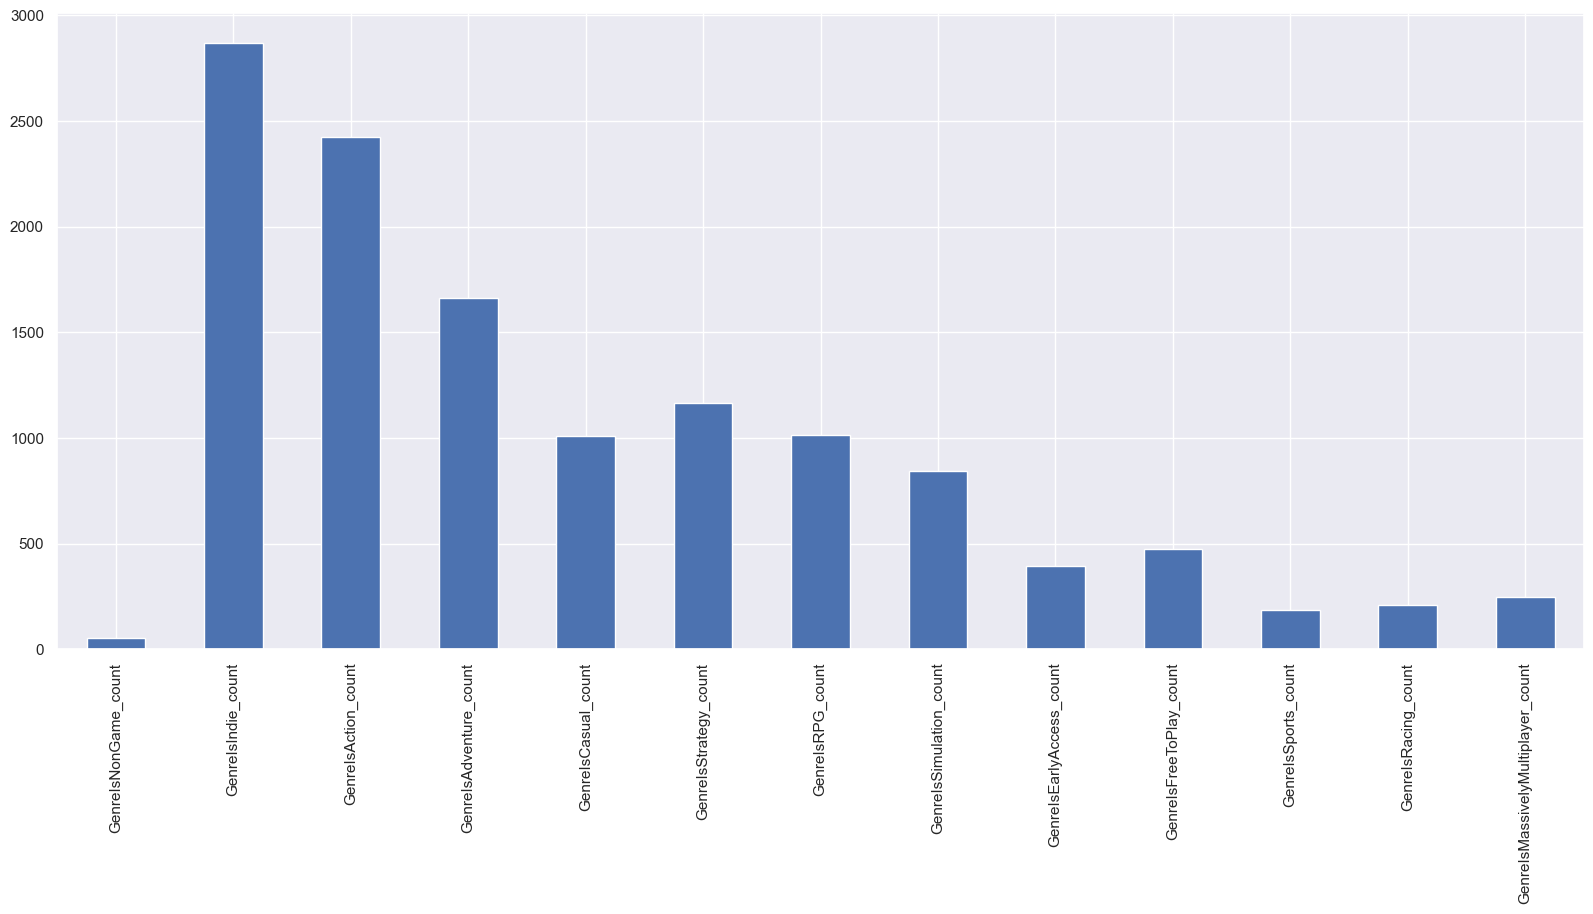

In [72]:
total_index.drop('ReleaseDate',axis=1).sum().plot(kind='bar')

Text(0.5, 0, '2017')

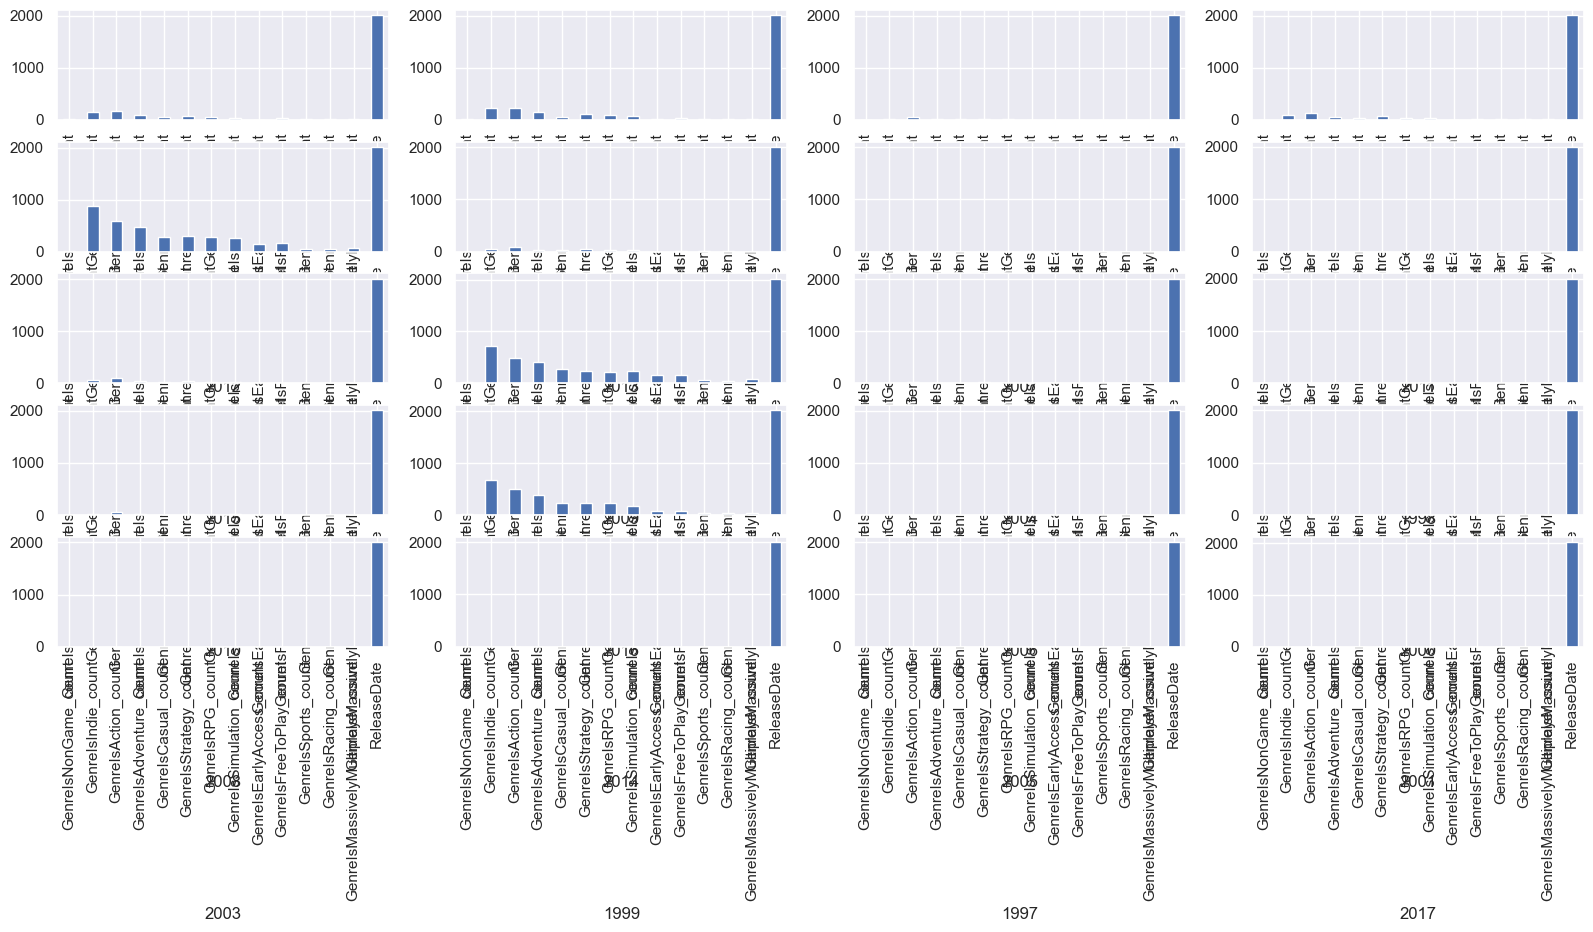

In [73]:
fig, ax = plt.subplots(5,4)
year_rank[0:1].sum().plot(kind='bar',ax=ax[0,0])
year_rank[1:2].sum().plot(kind='bar',ax=ax[0,1])
year_rank[2:3].sum().plot(kind='bar',ax=ax[0,2])
year_rank[3:4].sum().plot(kind='bar',ax=ax[0,3])
year_rank[4:5].sum().plot(kind='bar',ax=ax[1,0])
year_rank[5:6].sum().plot(kind='bar',ax=ax[1,1])
year_rank[6:7].sum().plot(kind='bar',ax=ax[1,2])
year_rank[7:8].sum().plot(kind='bar',ax=ax[1,3])
year_rank[8:9].sum().plot(kind='bar',ax=ax[2,0])
year_rank[9:10].sum().plot(kind='bar',ax=ax[2,1])
year_rank[10:11].sum().plot(kind='bar',ax=ax[2,2])
year_rank[11:12].sum().plot(kind='bar',ax=ax[2,3])
year_rank[12:13].sum().plot(kind='bar',ax=ax[3,0])
year_rank[13:14].sum().plot(kind='bar',ax=ax[3,1])
year_rank[14:15].sum().plot(kind='bar',ax=ax[3,2])
year_rank[15:16].sum().plot(kind='bar',ax=ax[3,3])
year_rank[16:17].sum().plot(kind='bar',ax=ax[4,0])
year_rank[17:18].sum().plot(kind='bar',ax=ax[4,1])
year_rank[18:19].sum().plot(kind='bar',ax=ax[4,2])
year_rank[19:20].sum().plot(kind='bar',ax=ax[4,3])
ax[0,0].set_xlabel('2012')
ax[0,1].set_xlabel('2013')
ax[0,2].set_xlabel('2007')
ax[0,3].set_xlabel('2011')
ax[1,0].set_xlabel('2015')
ax[1,1].set_xlabel('2009')
ax[1,2].set_xlabel('2004')
ax[1,3].set_xlabel('1998')
ax[2,0].set_xlabel('2010')
ax[2,1].set_xlabel('2016')
ax[2,2].set_xlabel('2006')
ax[2,3].set_xlabel('2000')
ax[3,0].set_xlabel('2008')
ax[3,1].set_xlabel('2014')
ax[3,2].set_xlabel('2005')
ax[3,3].set_xlabel('2001')
ax[4,0].set_xlabel('2003')
ax[4,1].set_xlabel('1999')
ax[4,2].set_xlabel('1997')
ax[4,3].set_xlabel('2017')

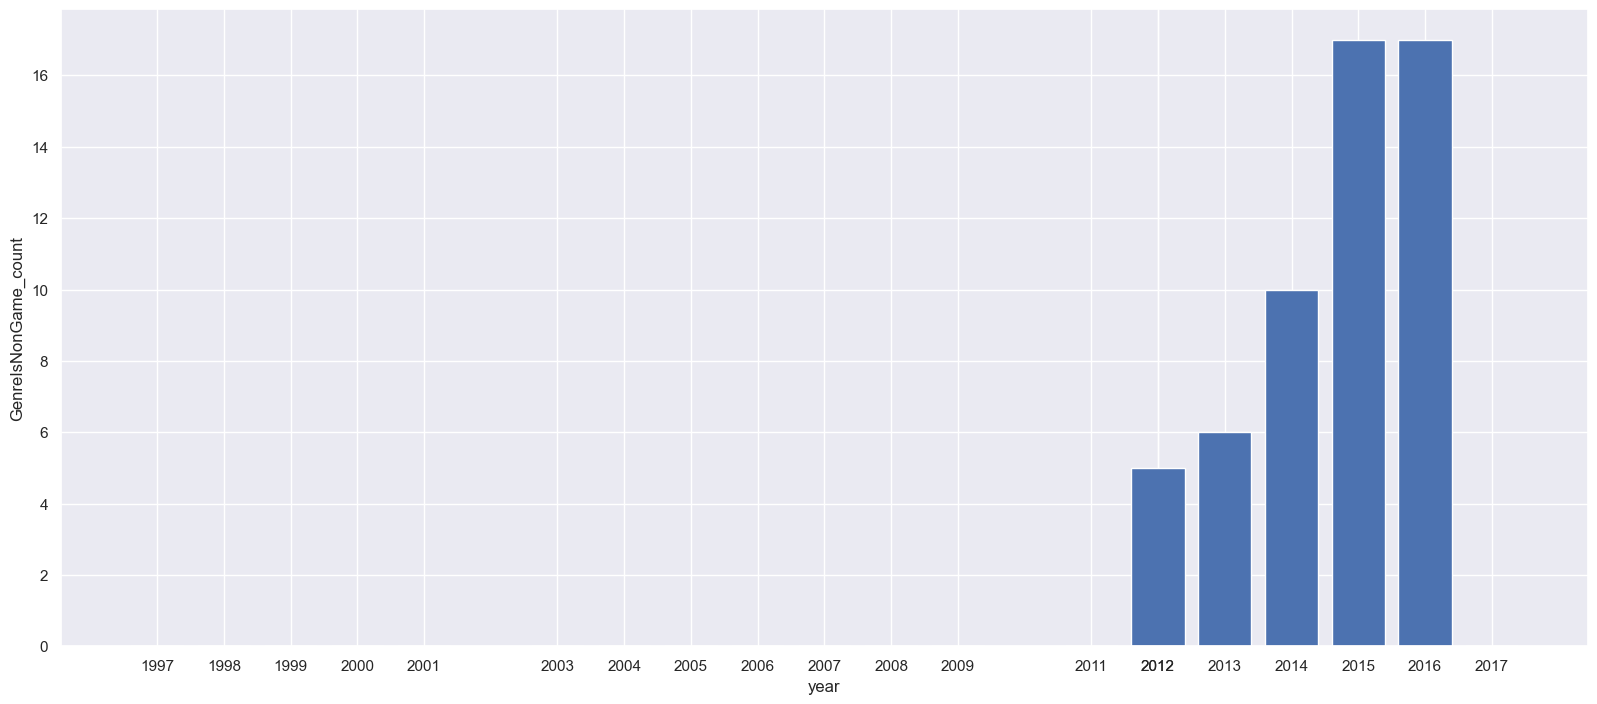

In [74]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsNonGame_count)
plt.ylabel('GenreIsNonGame_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

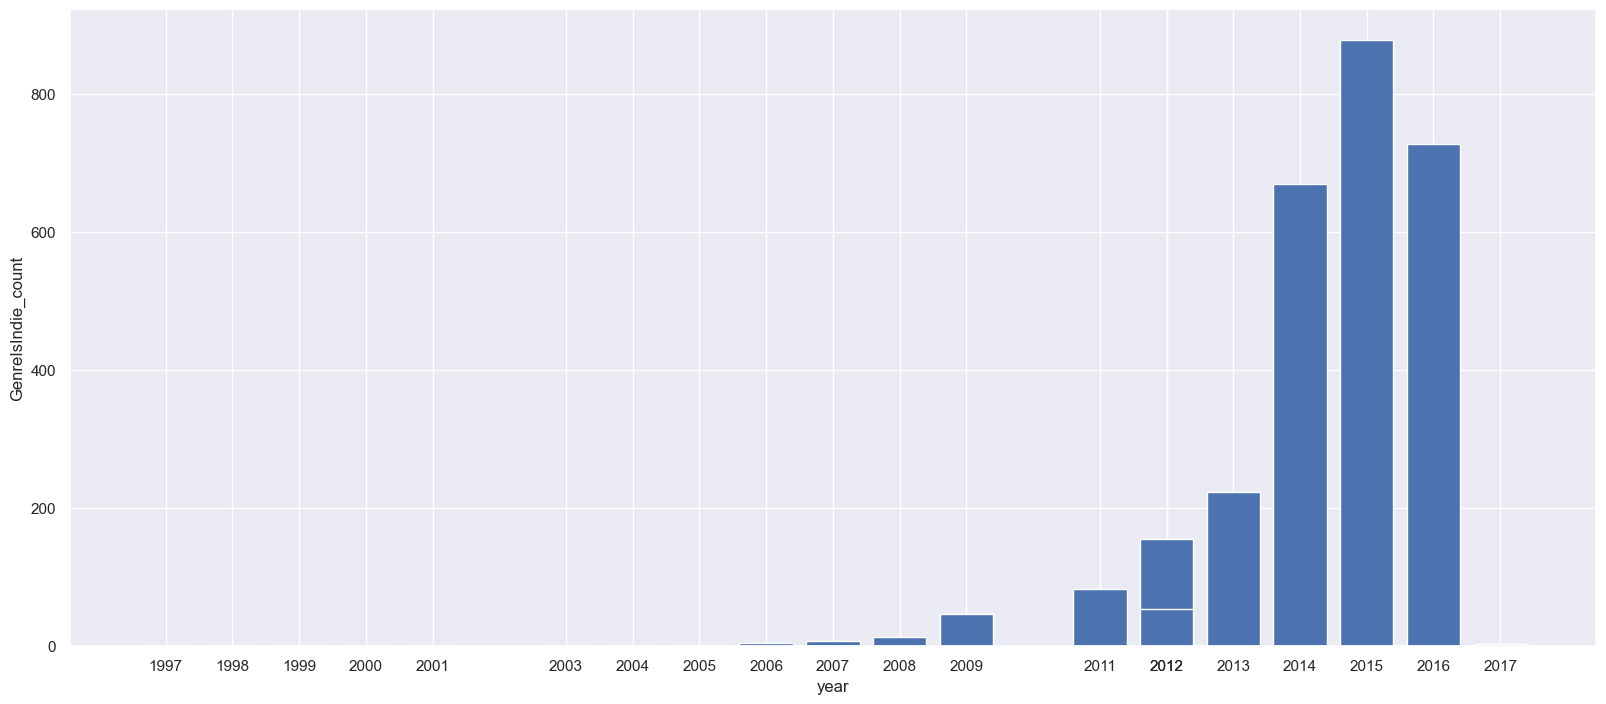

In [75]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsIndie_count)
plt.ylabel('GenreIsIndie_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

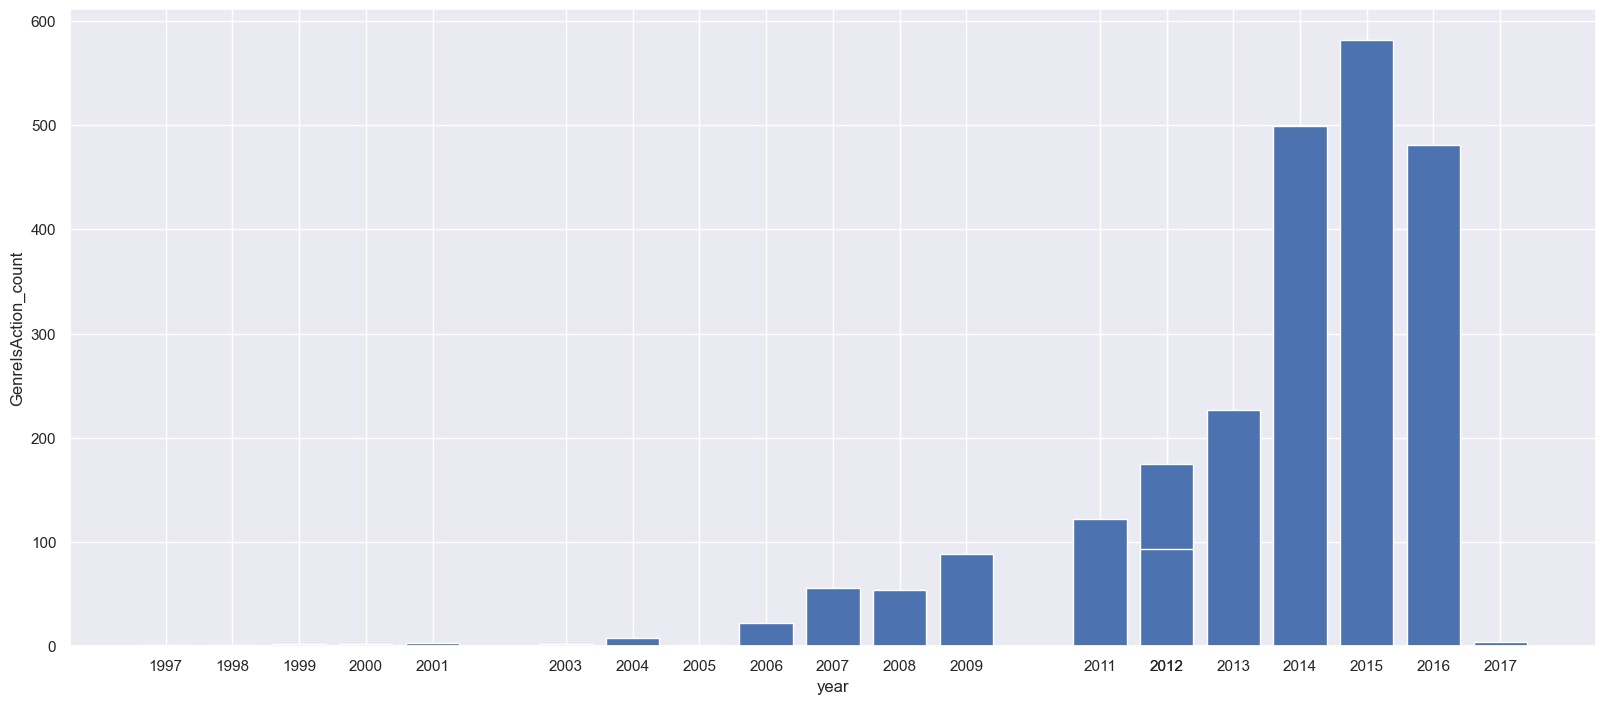

In [76]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsAction_count)
plt.ylabel('GenreIsAction_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

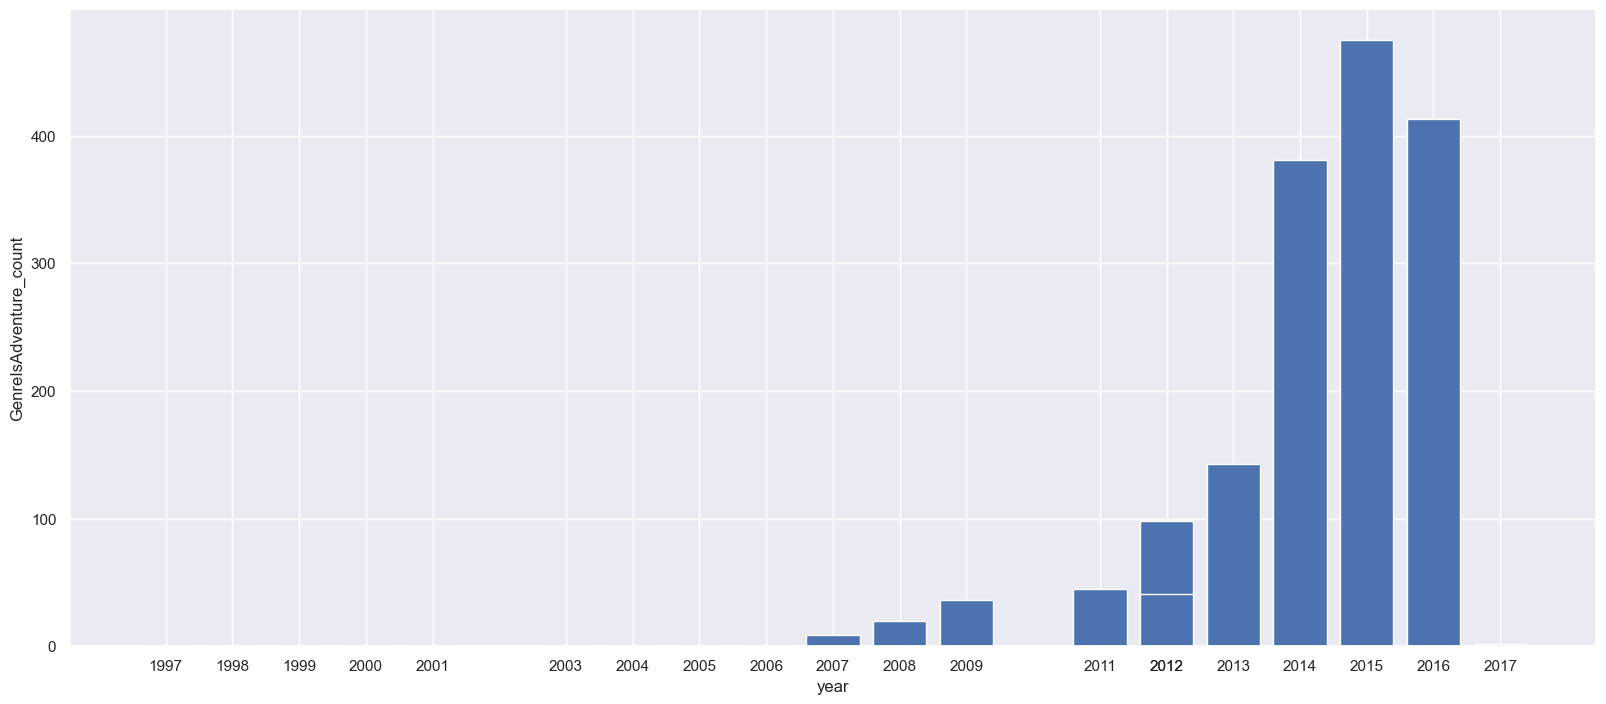

In [77]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsAdventure_count)
plt.ylabel('GenreIsAdventure_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

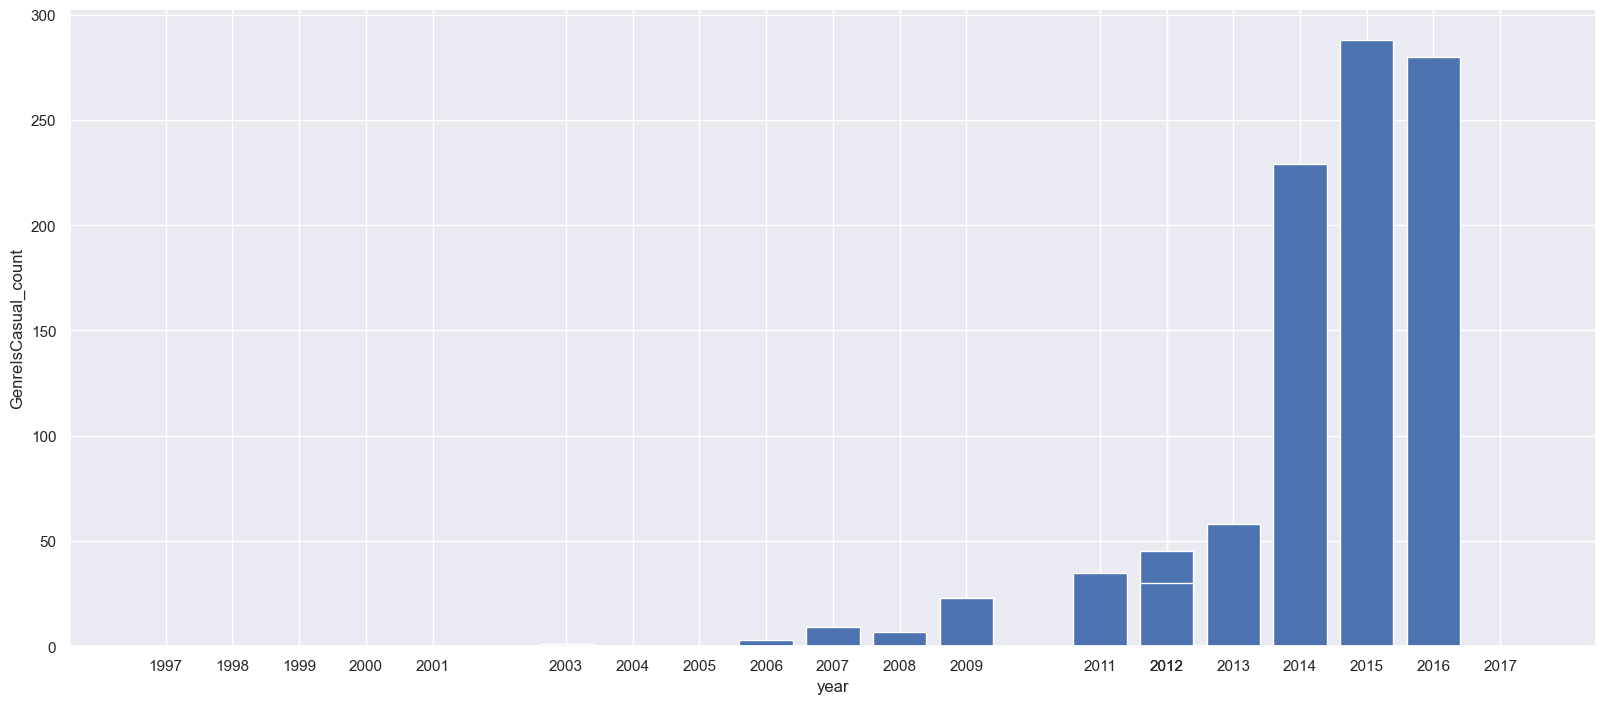

In [78]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsCasual_count)
plt.ylabel('GenreIsCasual_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

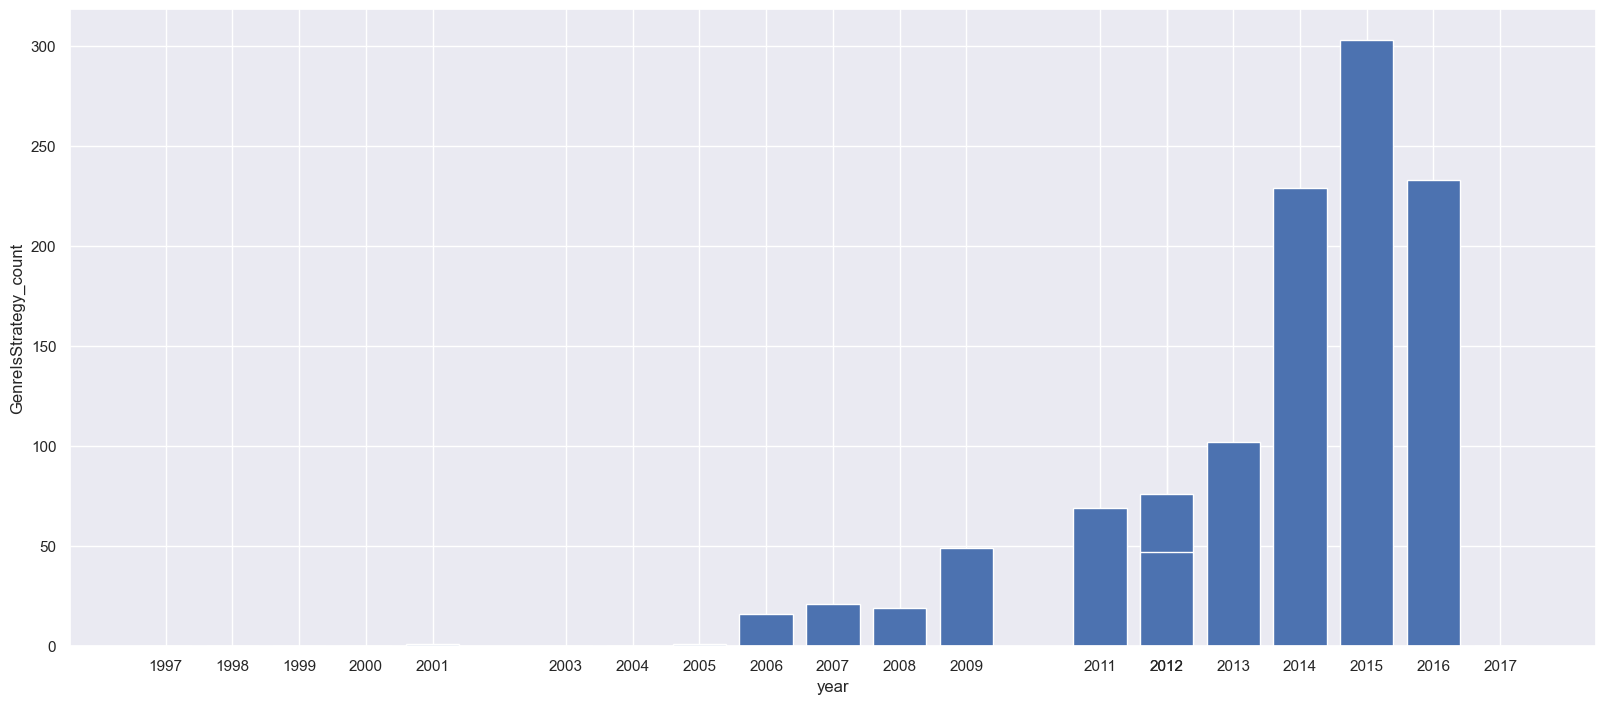

In [79]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsStrategy_count)
plt.ylabel('GenreIsStrategy_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

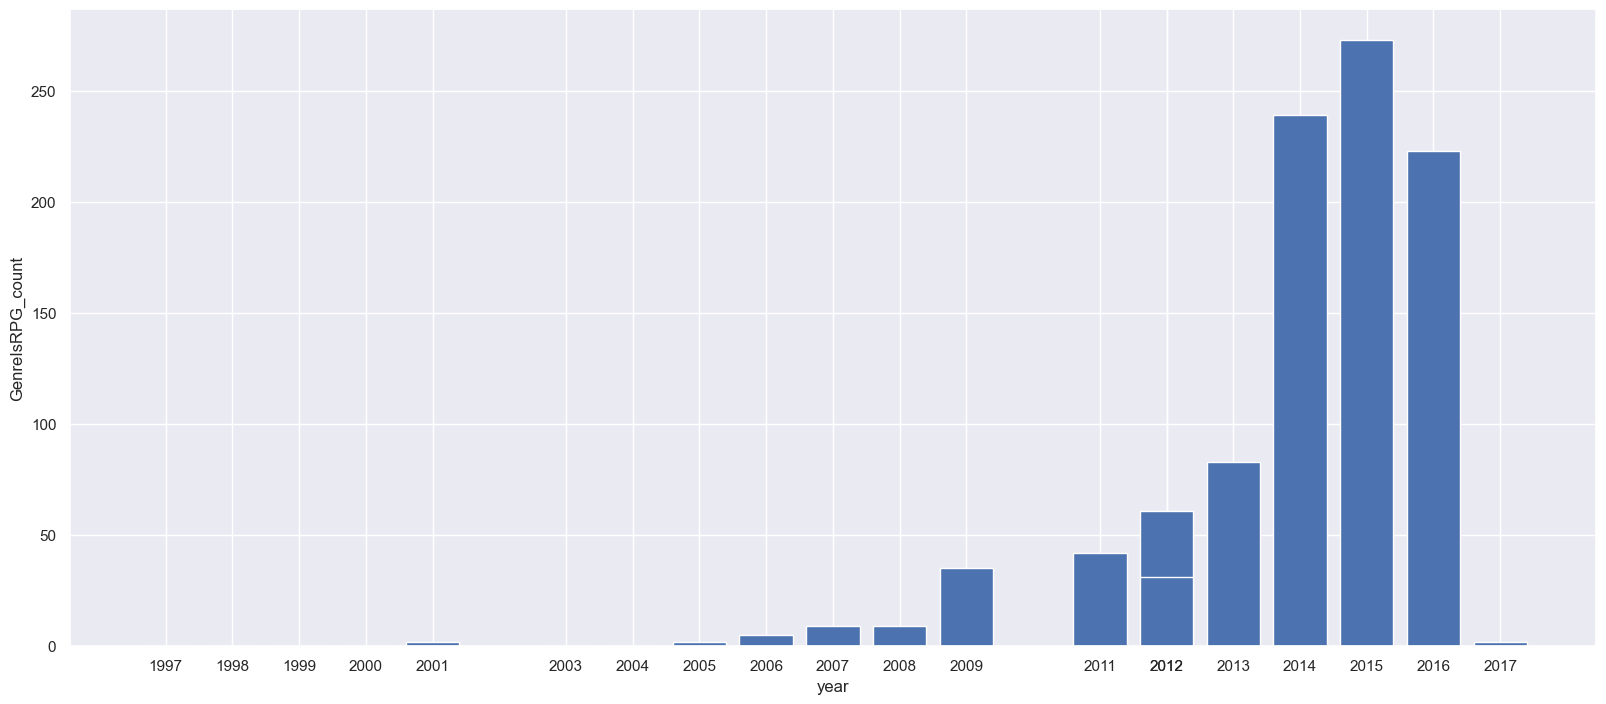

In [80]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsRPG_count)
plt.ylabel('GenreIsRPG_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

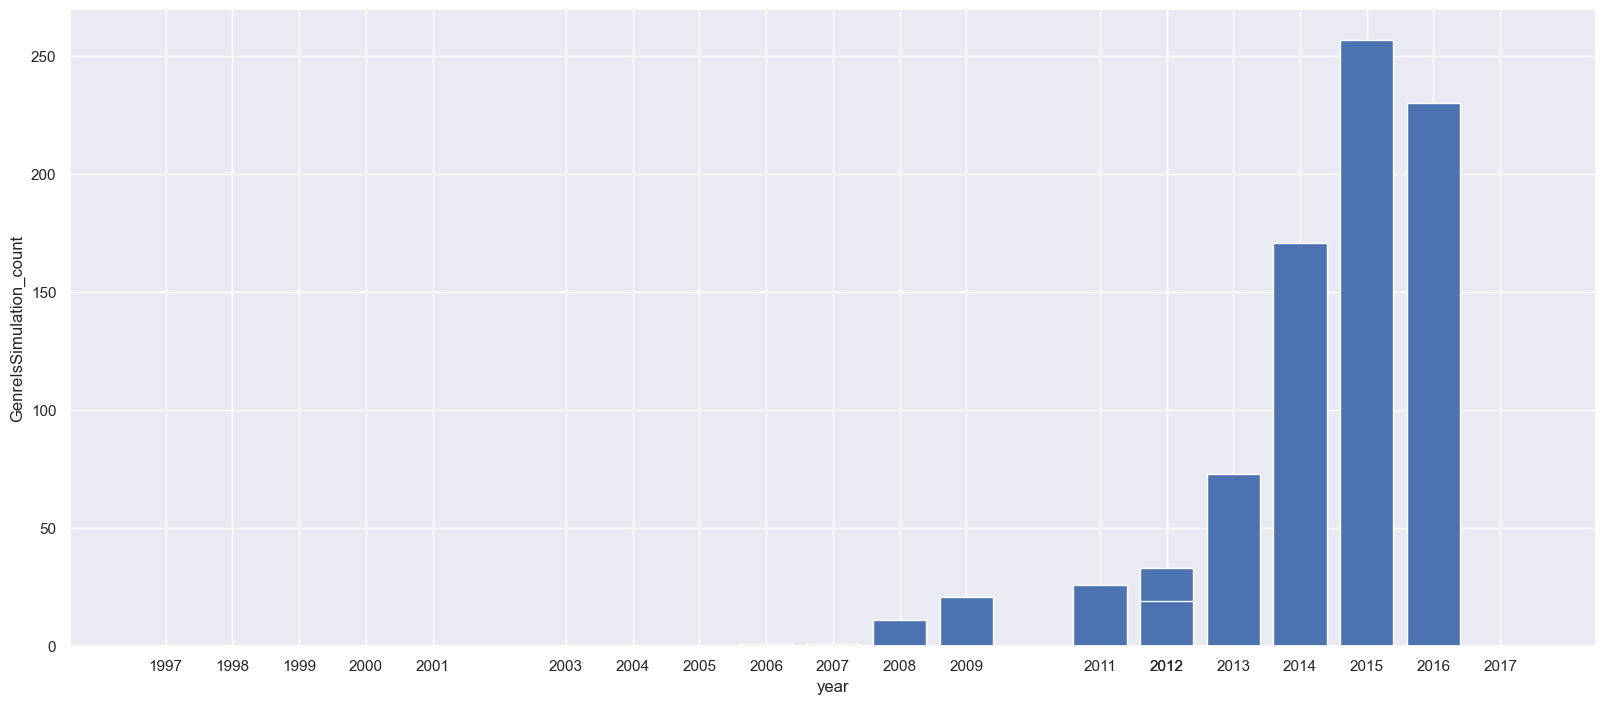

In [81]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsSimulation_count)
plt.ylabel('GenreIsSimulation_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

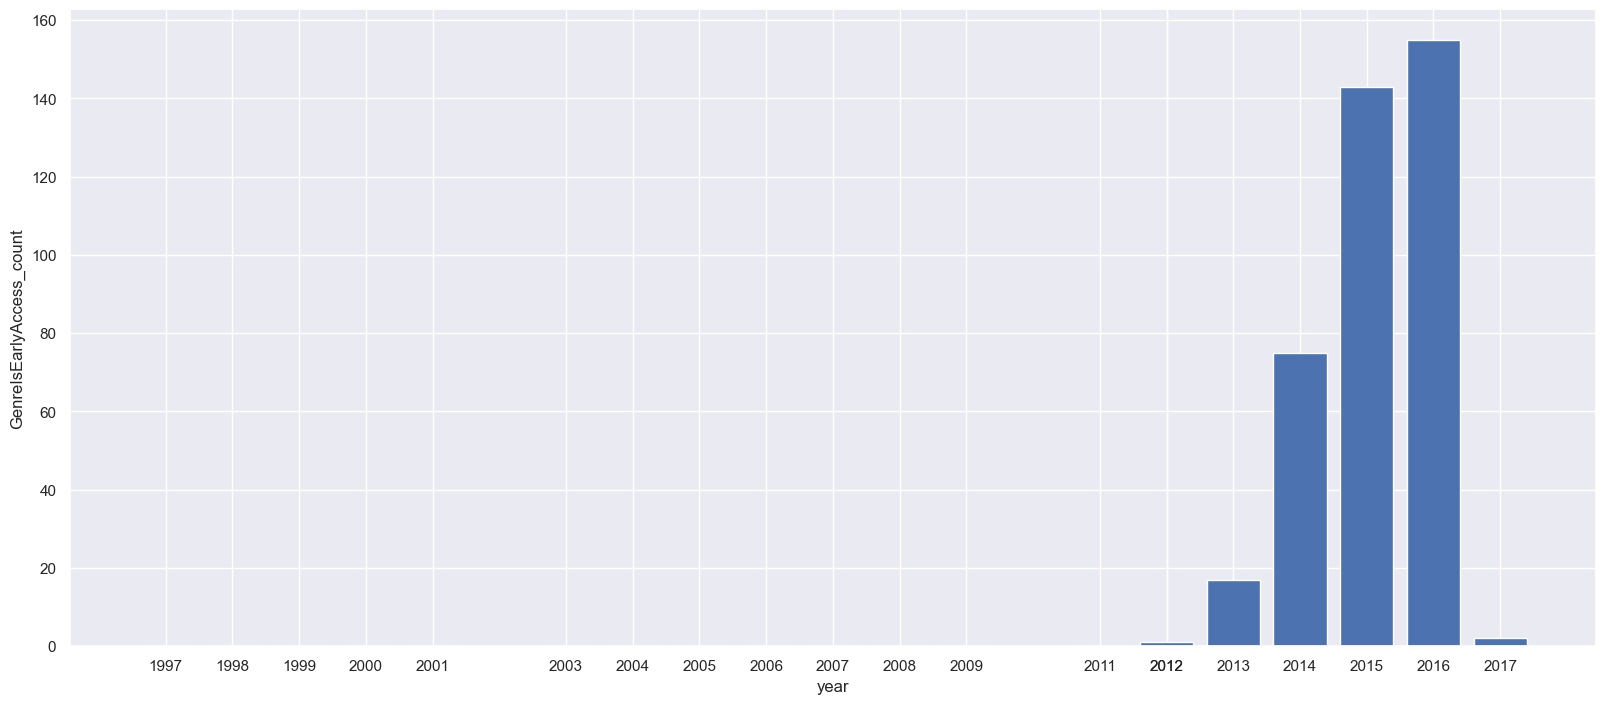

In [82]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsEarlyAccess_count)
plt.ylabel('GenreIsEarlyAccess_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

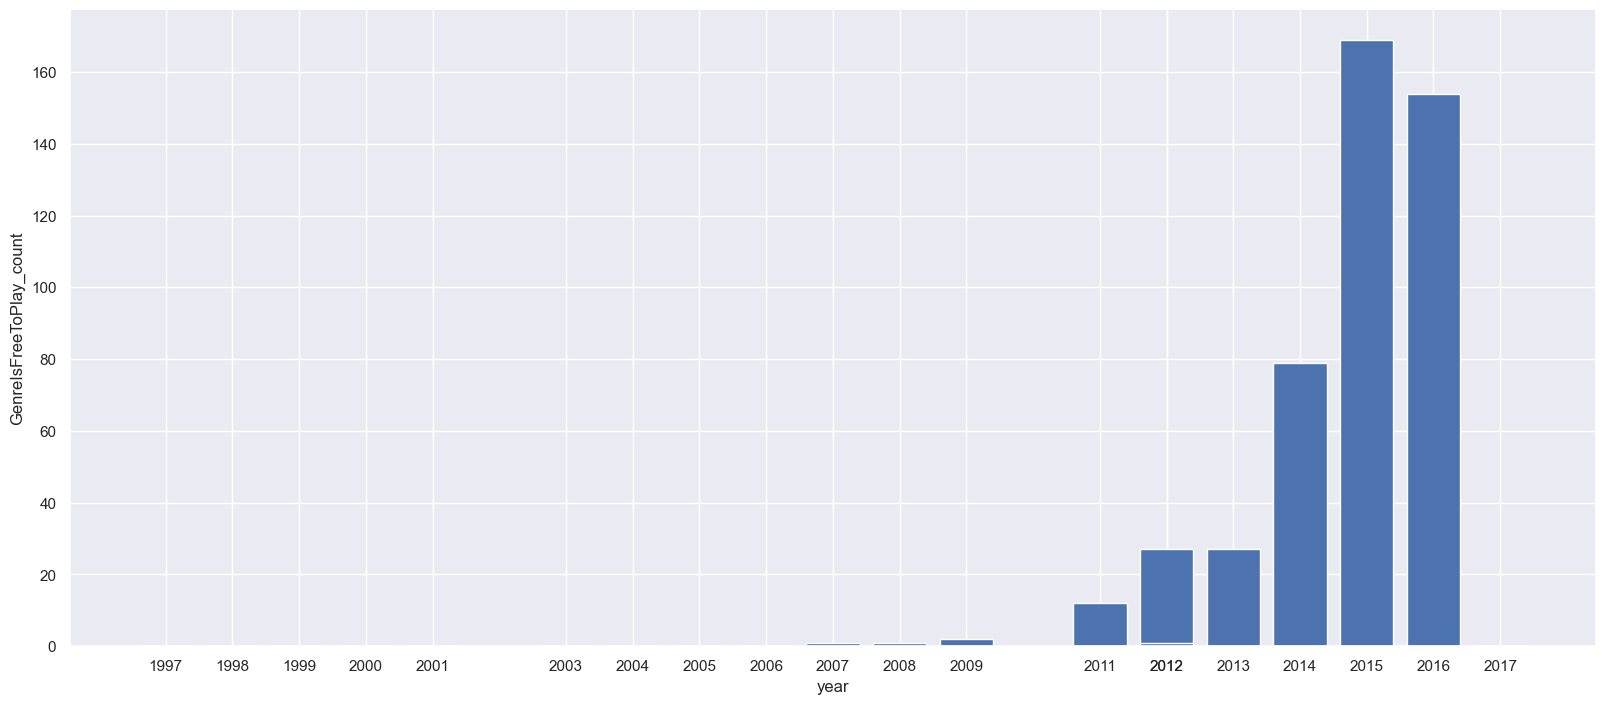

In [83]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsFreeToPlay_count)
plt.ylabel('GenreIsFreeToPlay_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

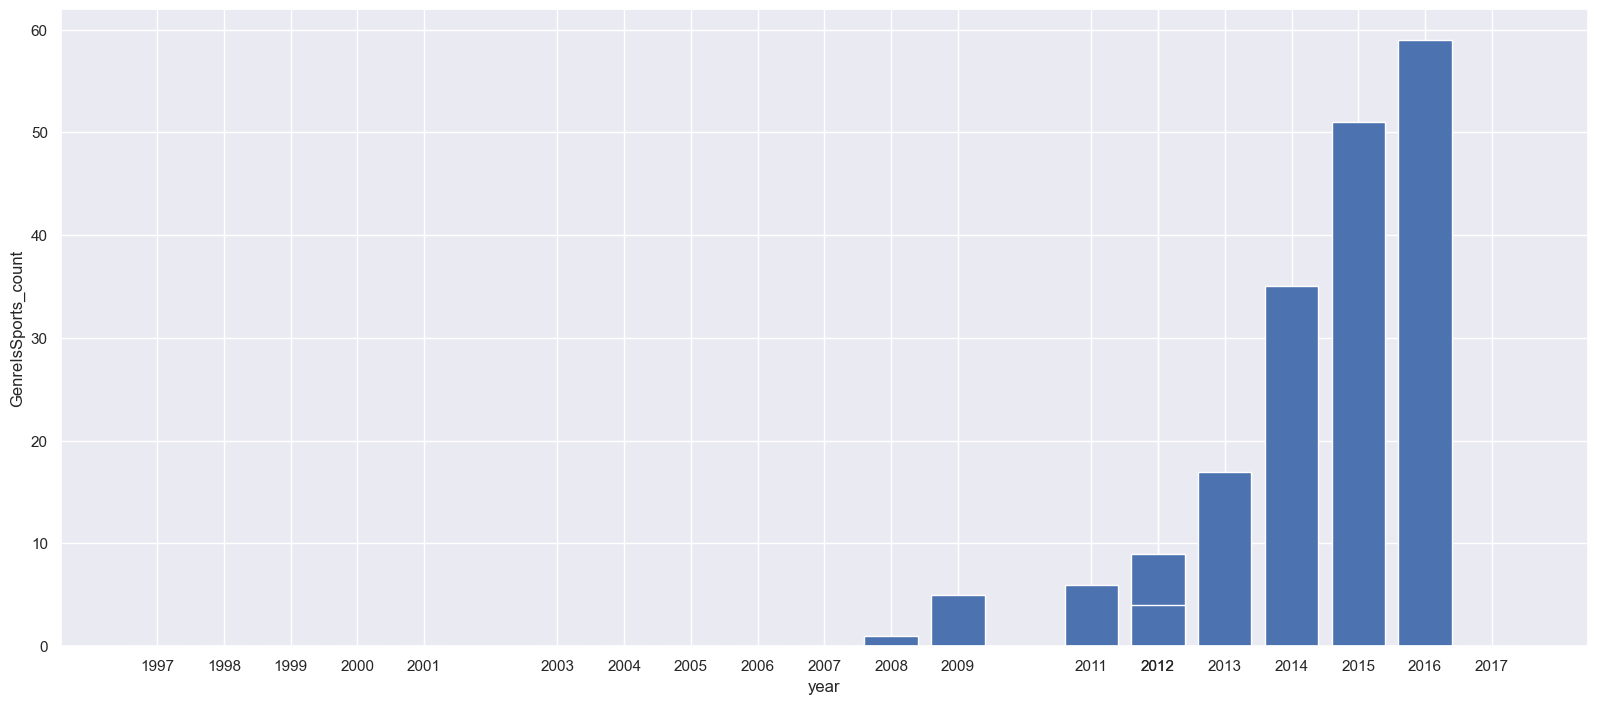

In [84]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsSports_count)
plt.ylabel('GenreIsSports_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

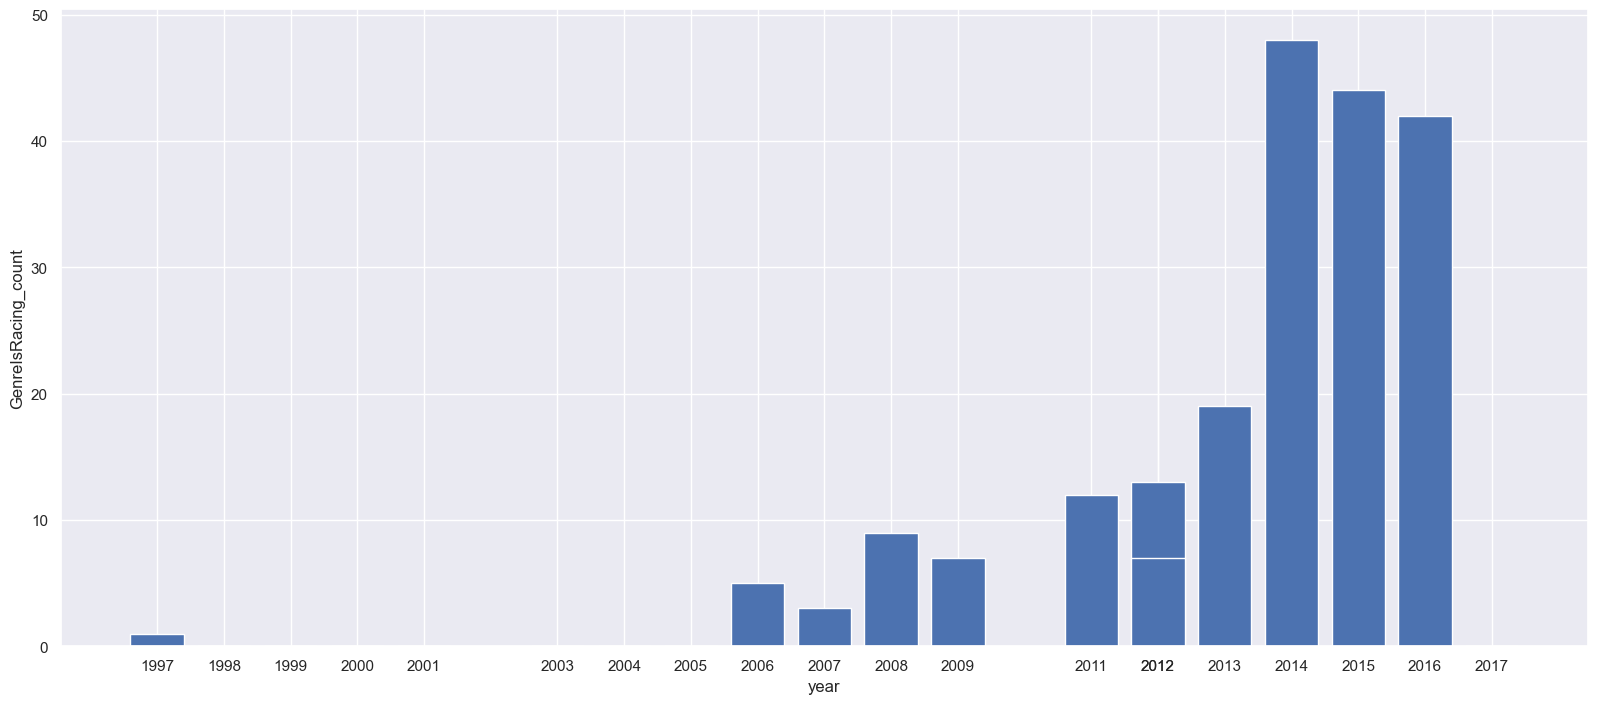

In [85]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsRacing_count)
plt.ylabel('GenreIsRacing_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()

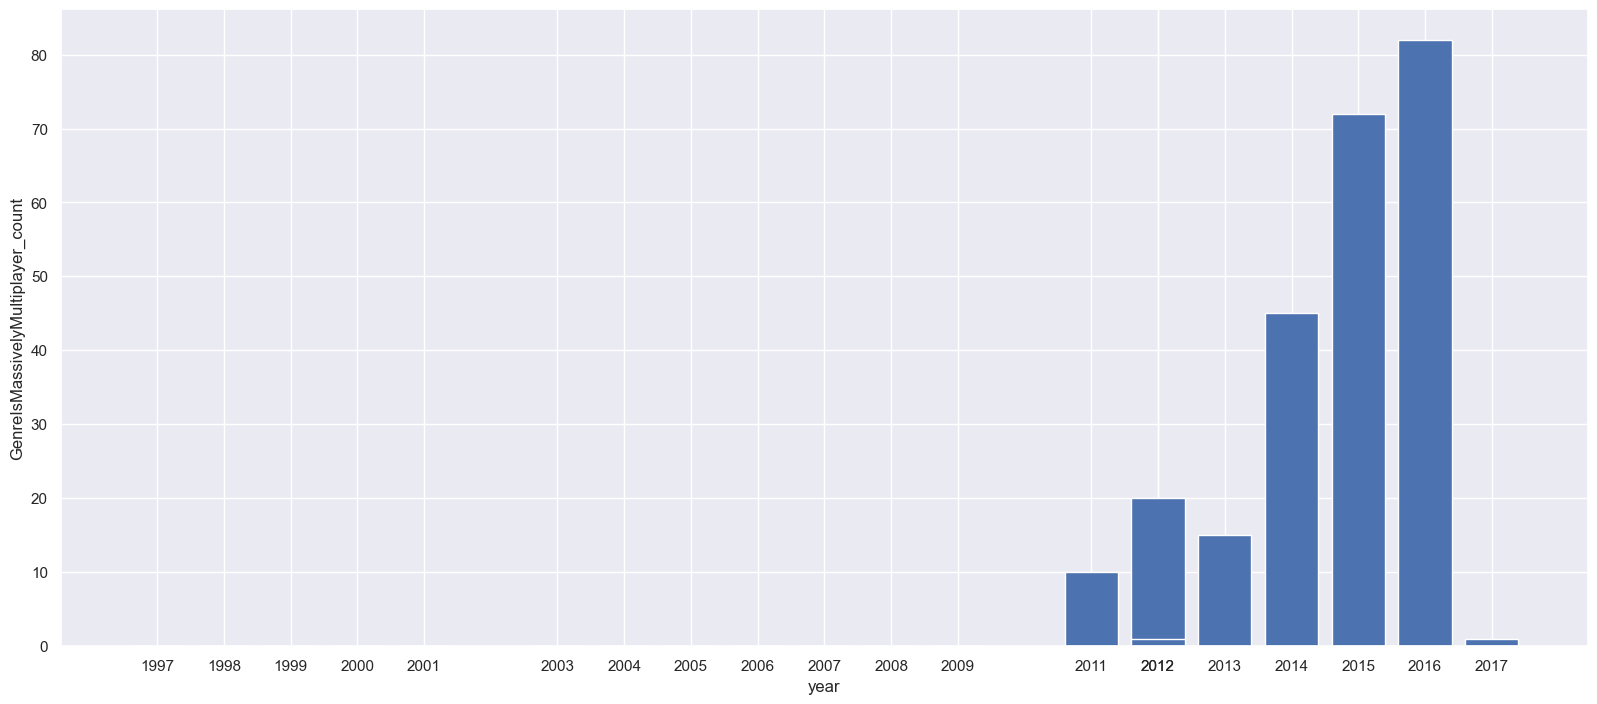

In [86]:
plt.bar(year_rank.ReleaseDate,year_rank.GenreIsMassivelyMultiplayer_count)
plt.ylabel('GenreIsMassivelyMultiplayer_count')
plt.xticks(year_rank.ReleaseDate)
plt.xlabel('year')
plt.show()